<a href="https://colab.research.google.com/github/AdeGit/AdeGit.github.io/blob/master/reference_notebook_malaria_detection_full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

##<b>Problem Definition</b>
-------------------
## **The context:**
------------------

Malaria, a life-threatening disease, is caused by Plasmodium parasites transmitted through the bite of infected female Anopheles mosquitoes. Once in the bloodstream, these parasites invade red blood cells, disrupting oxygen transport and potentially leading to severe complications like respiratory distress.

The insidious nature of malaria, often characterized by asymptomatic periods lasting over a year, underscores the importance of early detection. Delayed treatment can result in severe health consequences and even death.

Approximately half the world's population resides in regions at risk of malaria. In 2019 alone, over 229 million cases and 400,000 deaths were reported globally, with children under five years old disproportionately affected, accounting for 67% of malaria-related fatalities.

Traditional malaria diagnosis involves microscopic examination of blood smears by trained professionals to identify infected red blood cells. This manual process is time-consuming, labor-intensive, and prone to human error.

To address these limitations and improve diagnostic accuracy, automated systems utilizing machine learning and artificial intelligence are being explored. By employing deep learning algorithms, these systems can analyze microscopic images to detect malaria parasites with greater precision and efficiency, ultimately leading to earlier diagnosis and more effective treatment.

----------------------
## **The objectives:** What is the intended goal?
----------------------

Build an efficient computer vision model to detect malaria. The model should identify whether the
image of a red blood cell is that of one infected with malaria or not, and classify the same as
parasitized or uninfected, respectively.

----------------------
## **The key questions:** What are the key questions that need to be answered?
----------------------

#### Data Acquisition and Preparation:
  * Data Source: What is the source of the image dataset for training and testing the model?

  * Data Quality: How will data quality be ensured, including image resolution, clarity, and accurate labeling?

  * Data Augmentation: What techniques will be used to increase the diversity and size of the dataset (e.g., rotation, flipping, zooming)?

  * Data Preprocessing: How will images be preprocessed (e.g., normalization, resizing, noise reduction) to optimize model performance?

#### Model Architecture and Training:
  * Model Selection: Which deep learning architecture (e.g., CNN, ResNet, EfficientNet) is most suitable for malaria detection?
  
  * Feature Extraction: How will the model extract relevant features from the images, such as parasite shape, size, and color?

  * Model Training: What hyperparameters (e.g., learning rate, batch size, epochs) will be optimized for effective training?

  * Loss Function: Which loss function (e.g., cross-entropy loss, focal loss) will be used to guide the model's learning process?
  
  * Regularization Techniques: How will overfitting be prevented (e.g., dropout, L1/L2 regularization)?

#### Model Evaluation and Deployment:
  * Evaluation Metrics: Which metrics (e.g., accuracy, precision, recall, F1-score) will be used to assess the model's performance?
  
  * Model Optimization: How will the model be fine-tuned to improve its accuracy and efficiency?

  * Deployment Platform: On which platform (e.g., mobile app, web application, cloud-based service) will the model be deployed?

  * Real-world Testing: How will the model's performance be evaluated in real-world clinical settings, including robustness to variations in image quality and lighting conditions?
  
  * Ethical Considerations: How will data privacy and ethical guidelines be addressed in the development and deployment of the model?
-------------------------
## **The problem formulation:** What is it that we are trying to solve using data science?
-------------------------
Automate the detection of malaria parasites in microscopic images of blood smears. This involves:
  * Image Acquisition: Obtaining high-quality images of blood smears.
  * Image Preprocessing: Cleaning and enhancing the images for analysis.
  * Feature Extraction: Identifying relevant features in the images (e.g., parasite shape, size, and color).
  * Model Training: Training a machine learning model to classify images as "infected" or "uninfected."
  * Model Evaluation: Assessing the model's performance on a validation dataset.
  * Deployment: Integrating the model into a real-world application (e.g., a mobile app, a laboratory system).
----------------------
## **Data Description:**
----------------------

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [ ]:
# Mount Google drive to access the dataset
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pathZip = '/content/drive/MyDrive/Data Science & AI/Week_9/Capstone_Project/cell_images.zip'

### <b>Loading libraries</b>

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns
import zipfile
import keras
from PIL import Image                                                                           # Importing seaborn to plot graphs



# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### <b>Let us load the data and Perform Data preparation</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
with zipfile.ZipFile(pathZip, 'r') as zip_ref:
  zip_ref.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Paths to the training and testing data folders
TRAIN_DATADIR = '/content/cell_images/train'  # Replace with the actual path to training data
TEST_DATADIR = '/content/cell_images/test'    # Replace with the actual path to testing data

# Image size for resizing (height, width, channels)
IMG_SIZE = 64  # Desired size for the images (square)
CHANNELS = 3    # Number of channels (RGB)

def load_and_preprocess_data(data_dir):
    """
    Load and preprocess images from the specified directory.

    Args:
        data_dir (str): Path to the directory containing images.

    Returns:
        tuple: A tuple containing the image data as a 4D NumPy array and the labels as a 1D NumPy array.
    """
    images = []
    labels = []

    # Iterate over the parasitized and uninfected folders
    for folder_name in ['parasitized', 'uninfected']:
        folder_path = os.path.join(data_dir, folder_name)
        image_filenames = os.listdir(folder_path)

        for image_name in image_filenames:
            try:
                # Load and resize the image
                image_path = os.path.join(folder_path, image_name)
                image = Image.open(image_path).resize((IMG_SIZE, IMG_SIZE))
                image = np.array(image)  # Convert to a NumPy array

                # Ensure the image has the correct number of channels
                if image.shape[-1] != CHANNELS:
                    image = np.stack([image] * CHANNELS, axis=-1) if len(image.shape) == 2 else image[:, :, :CHANNELS]

                # Append the image and corresponding label
                images.append(image)
                labels.append(1 if folder_name == 'parasitized' else 0)
            except Exception as e:
                print(f"Error processing {image_name}: {e}")

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load and preprocess the training data
train_images, train_labels = load_and_preprocess_data(TRAIN_DATADIR)
print("Training Data Shape:", train_images.shape, train_labels.shape)

# Load and preprocess the testing data
test_images, test_labels = load_and_preprocess_data(TEST_DATADIR)
print("Testing Data Shape:", test_images.shape, test_labels.shape)


print("Train Images Shape:", train_images.shape)
#print("Validation Images Shape:", val_images.shape)
print("Train Labels Shape:", train_labels.shape)
#print("Validation Labels Shape:", val_labels.shape)


Training Data Shape: (24958, 64, 64, 3) (24958,)
Testing Data Shape: (2600, 64, 64, 3) (2600,)
Train Images Shape: (24958, 64, 64, 3)
Train Labels Shape: (24958,)


###<b> Check the shape of train and test images

In [ ]:
# printing the shape of train and test images
print("Training image Shape:", train_images.shape)
print("Testing image Shape:", test_images.shape)


Training image Shape: (24958, 64, 64, 3)
Testing image Shape: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
# printing the shape of train and test images
print("Training Labels Shape:", train_labels.shape)
print("Testing Label Shape:", test_labels.shape)


Training Labels Shape: (24958,)
Testing Label Shape: (2600,)


####<b> Observations:</b>
#### Training Data Shape:

  * Images: (24958, 64, 64, 3) - Total of 24,958 training images, each resized to 64x64 with 3 color channels (RGB).
  * Labels: (24958,) - Corresponding scalar labels for the training images.

#### Testing Data Shape:

  * Images: (2600, 64, 64, 3) - Total of 2,600 test images, preprocessed similarly to the training data.
  * Labels: (2600,) - Corresponding scalar labels for the test images.

####<b> Insights:</b>
* It's important to ensure that both the train and test labels are balanced across classes (e.g., Uninfected and Parasitized).

* Train and test labels should have the same format and class indices (Uninfected = 0, Parasitized = 1). This ensures correct interpretation of the predictions and evaluation metrics.

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Check the pixel value range for training images
train_min_pixel = train_images.min()
train_max_pixel = train_images.max()
print(f"Train Images - Min Pixel Value: {train_min_pixel}, Max Pixel Value: {train_max_pixel}")

# Check the pixel value range for testing images
test_min_pixel = test_images.min()
test_max_pixel = test_images.max()
print(f"Test Images - Min Pixel Value: {test_min_pixel}, Max Pixel Value: {test_max_pixel}")



Train Images - Min Pixel Value: 0, Max Pixel Value: 255
Test Images - Min Pixel Value: 0, Max Pixel Value: 255


####<b> Observations:</b>
  * The images pixel values range from 0 - 255.
  * This indicates the images are not normalized yet  

####<b> insights:</b>
* Normalizing pixel values helps stabilize training, as the model weights adjust more efficiently when inputs are scaled uniformly.



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Count the number of uninfected and parasitized images in the training data
train_uninfected_count = np.sum(train_labels == 0)
train_parasitized_count = np.sum(train_labels == 1)

print(f"Training Data - Uninfected: {train_uninfected_count}, Parasitized: {train_parasitized_count}")

# Count the number of uninfected and parasitized images in the testing data
test_uninfected_count = np.sum(test_labels == 0)
test_parasitized_count = np.sum(test_labels == 1)

print(f"Testing Data - Uninfected: {test_uninfected_count}, Parasitized: {test_parasitized_count}")



Training Data - Uninfected: 12376, Parasitized: 12582
Testing Data - Uninfected: 1300, Parasitized: 1300


####<b> Observation: </b>
  * The difference in counts between the two categories is minimal, with parasitized images exceeding uninfected ones by just 98 images. This small discrepancy is unlikely to introduce significant bias during training.

###<b>Normalize the images

In [ ]:
# Ensure data type is float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the images
train_images /= 255.0
test_images /= 255.0

# Check shapes and data types
print("Train images data type:", train_images.dtype)
print("Test images data type:", test_images.dtype)

# Print the min and max values after normalization
print(f"After Normalization - Train Min: {train_images.min():.4f}, Max: {train_images.max():.4f}")
print(f"After Normalization - Test Min: {test_images.min():.4f}, Max: {test_images.max():.4f}")

Train images data type: float32
Test images data type: float32
After Normalization - Train Min: 0.0000, Max: 1.0000
After Normalization - Test Min: 0.0000, Max: 1.0000


####<b> Observations:</b>
  * Data Type: Both train_images and test_images are of type float32. This is the appropriate data type for numerical calculations in machine learning.
  
  * Normalization: The minimum and maximum values of both the training and test images are 0.0 and 1.0, respectively. This confirms that the normalization process has been successful.

####<b>insights:</b>

  * Normalizing this data will help to address some of the computational issues in machine learning such as Vanishing and Exploding gradient.
  
  * Normalized inputs ensure consistent weight updates, leading to faster and more stable convergence.

###<b> Plot to check if the data is balanced

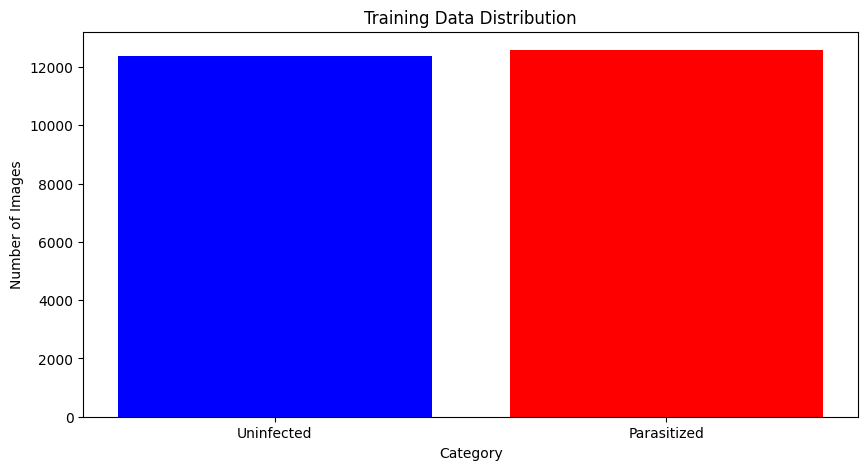

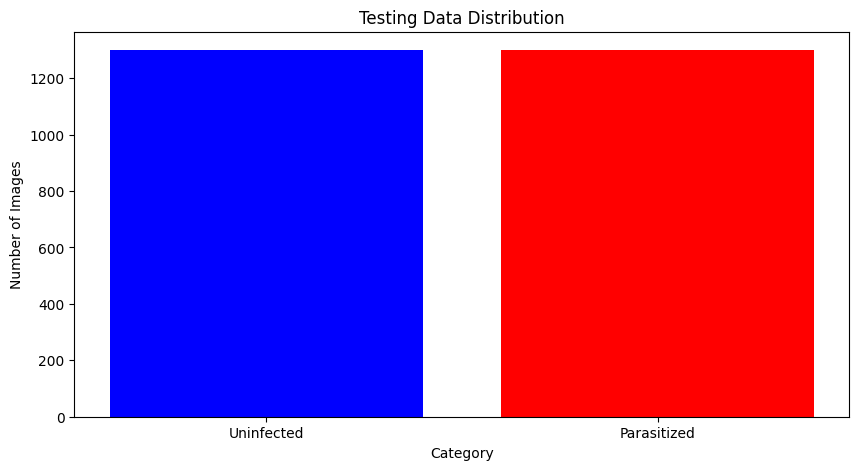

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting (replace these with actual counts if needed)
categories = ['Uninfected', 'Parasitized']
train_counts = [12376, 12582]  # Training data counts
test_counts = [1300, 1300]    # Testing data counts

# Plot for Training Data Distribution
plt.figure(figsize=(10, 5))
plt.bar(categories, train_counts, color=['blue', 'red'])
plt.title('Training Data Distribution')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.show()

# Plot for Testing Data Distribution
plt.figure(figsize=(10, 5))
plt.bar(categories, test_counts, color=['blue', 'red'])
plt.title('Testing Data Distribution')
plt.ylabel('Number of Images')
plt.xlabel('Category')
plt.show()


####<b> Observations:</b>
Training Data Distribution:

  * Uninfected: 12,376 images.
  * Parasitized: 12,582 images.
  * The training dataset is nearly balanced, with parasitized images slightly exceeding uninfected images by 206 images. This difference is minimal and should not introduce significant bias during training.

Testing Data Distribution:

  * Uninfected: 1,300 images.
  * Parasitized: 1,300 images.
  * The testing dataset is perfectly balanced, ensuring unbiased model evaluation.

####<b>insights:</b>
  * Balanced datasets ensure that the model does not favor one class over the other, leading to fair predictions for all categories.

### <b>Data Exploration</b>
Let's visualize the images from the train data

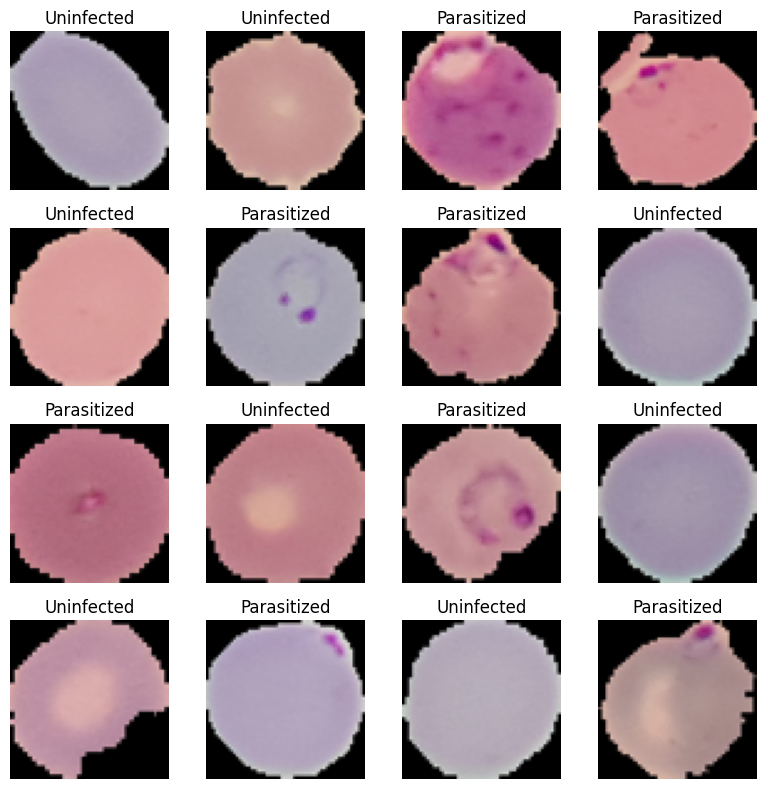

In [ ]:
# Setting a fixed random seed for reproducibility
np.random.seed(42)

def visualize_random_images(images, labels, categories, grid_size=(4, 4)):
    """
    Visualize random images from the dataset with their respective labels.

    Args:
        images (np.ndarray): Array of images.
        labels (np.ndarray): Array of corresponding labels.
        categories (list): List of category names (e.g., ['Uninfected', 'Parasitized']).
        grid_size (tuple): Tuple specifying the grid size (rows, cols).
    """
    num_images = grid_size[0] * grid_size[1]  # Total images to plot
    plt.figure(figsize=(8, 8))

    for n in range(num_images):
        plt.subplot(grid_size[0], grid_size[1], n + 1)

        # Select a random index
        index = np.random.randint(0, images.shape[0])

        # Set title based on label
        plt.title(categories[labels[index]], fontsize=12)

        # Display the image
        plt.imshow(images[index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
categories = ['Uninfected', 'Parasitized']
visualize_random_images(train_images, train_labels, categories, grid_size=(4, 4))


####<b> Observations:</b>
* Uninfected Cells:
  * Appear with smooth, homogeneous cytoplasm.
  * No visible parasites or irregularities inside the cell.
* Parasitized Cells:
  * Show distinct purple-stained areas, indicating the presence of malaria parasites.
  * Some parasitized cells have irregular cytoplasmic inclusions.
  
* The dataset includes well-labeled examples of both uninfected and parasitized cells, crucial for training a robust classification model.

* Variability in staining and cell structure introduces realistic challenges, which helps the model generalize better.

####<b> Insights:</b>
* The presence of purple spots or inclusions is a clear indicator of parasitization, which could be used for distinguishing between healthy and infected samples.
* The visual differences (color, structure, and presence of parasites) suggest that image analysis models or diagnostic tools could automate detection.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

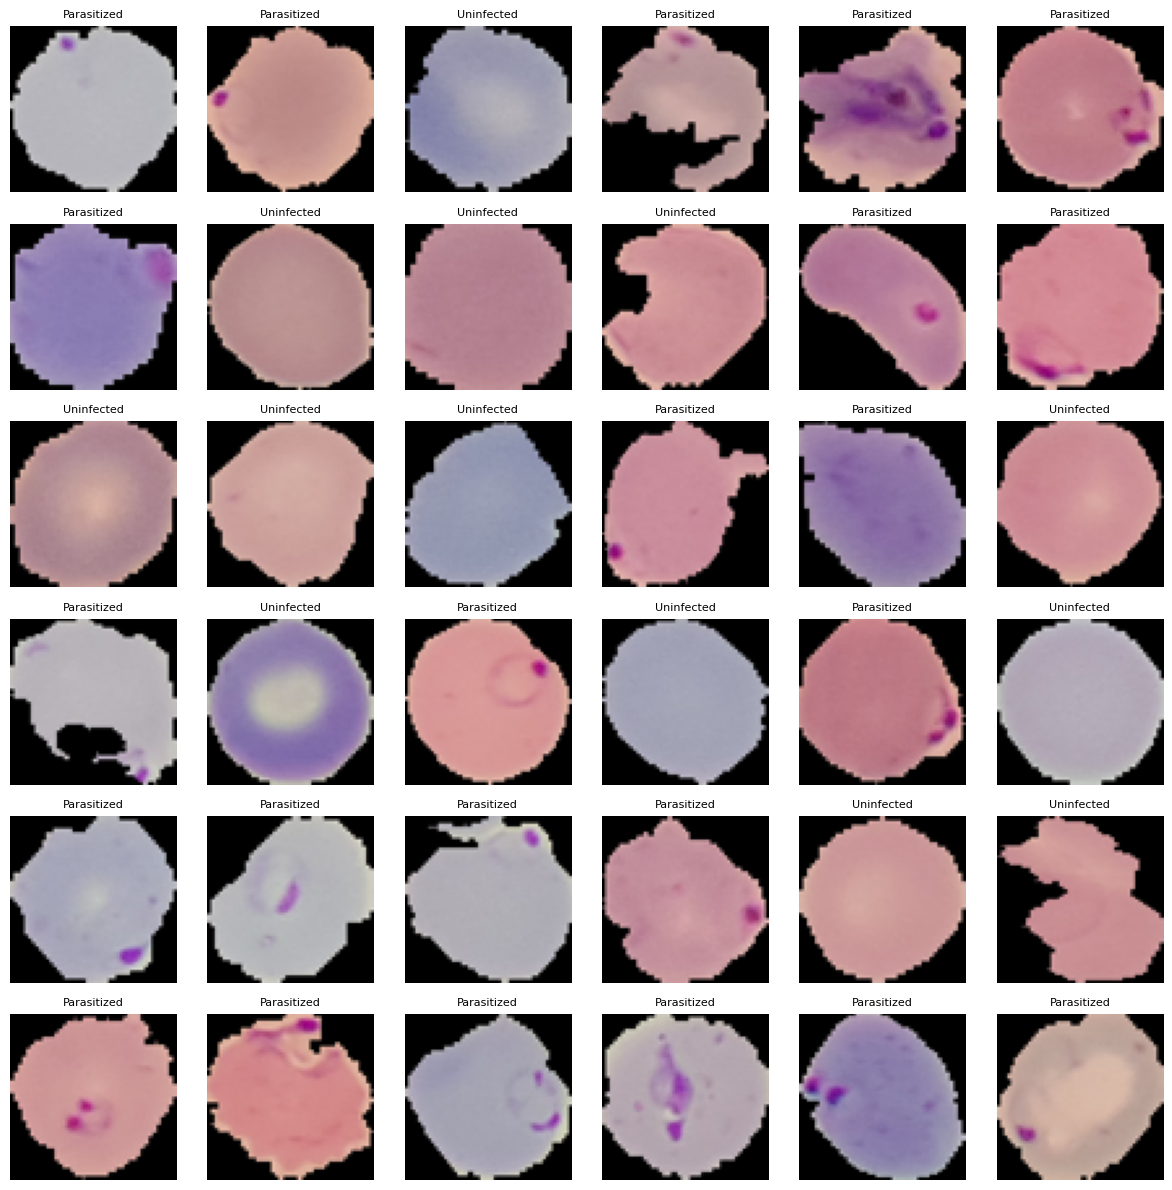

In [ ]:
# Visualize the images with a 6x6 grid
def visualize_images_grid(images, labels, categories, grid_size=(6, 6), figsize=(12, 12)):
    """
    Visualize random images from the dataset in a grid.

    Args:
        images (np.ndarray): Array of images.
        labels (np.ndarray): Array of labels corresponding to images.
        categories (list): List of category names (e.g., ['Uninfected', 'Parasitized']).
        grid_size (tuple): Tuple specifying the grid size (rows, cols).
        figsize (tuple): Tuple specifying the figure size.
    """
    num_images = grid_size[0] * grid_size[1]  # Total images to plot
    plt.figure(figsize=figsize)

    for n in range(num_images):
        plt.subplot(grid_size[0], grid_size[1], n + 1)

        # Select a random index
        index = np.random.randint(0, images.shape[0])

        # Set title based on label
        plt.title(categories[labels[index]], fontsize=8)

        # Display the image
        plt.imshow(images[index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
categories = ['Uninfected', 'Parasitized']
visualize_images_grid(train_images, train_labels, categories, grid_size=(6, 6), figsize=(12, 12))




####<b>Observations:</b>
Category Distribution:

* The grid alternates between "Parasitized" and "Uninfected" cells.
* The labels are clearly distinguishable, ensuring that the dataset includes visually distinct classes.

Characteristics of Parasitized Cells:

* Purple or darker staining is evident, indicating the presence of the malaria parasite.
* Parasitized cells often have irregular or darker inclusions within the cytoplasm.

Characteristics of Uninfected Cells:

* Smooth and consistent appearance without inclusions.
* Lighter staining with homogeneous cytoplasm.

Diversity in Images:

* Both categories exhibit variability in cell size, orientation, and staining intensity.
* This variability introduces a realistic challenge, enhancing the model's ability to generalize.

**Insights:**

Balanced Dataset:

* The visualization suggests an adequate representation of both "Parasitized" and "Uninfected" categories, which is crucial for training a balanced classification model.

Distinctive Features:

* The distinct visual patterns in "Parasitized" and "Uninfected" cells provide a good basis for the model to learn discriminative features.

Potential Challenges:

* Variability in staining and image quality may pose challenges for the model, but they also promote robustness by simulating real-world conditions.

Future Steps:

* The dataset seems suitable for training a convolutional neural network (CNN) to classify cells. Further preprocessing, such as augmentation, may help improve model performance.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

In [ ]:
# Calculate mean images
mean_parasitized = train_images[train_labels == 1].mean(axis=0)
mean_uninfected = train_images[train_labels == 0].mean(axis=0)

<b> Mean image for parasitized

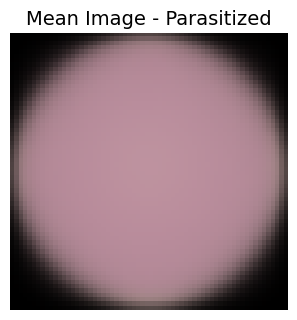

In [ ]:
# Plot mean images
plt.figure(figsize=(6, 6))

# Parasitized mean image
plt.subplot(1, 2, 1)
plt.imshow(mean_parasitized)
plt.title("Mean Image - Parasitized", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

<b> Mean image for uninfected

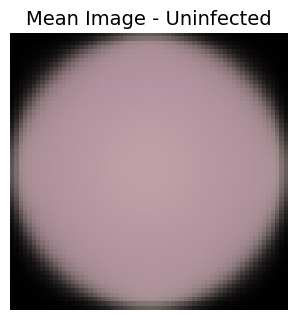

In [ ]:
# Plot mean images
plt.figure(figsize=(6, 6))
# Uninfected mean image
plt.subplot(1, 2, 2)
plt.imshow(mean_uninfected)
plt.title("Mean Image - Uninfected", fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()

####<b> Observations and insights:</b>
**Parasitized**
* The central area is a pinkish hue, indicating the average staining pattern observed in parasitized cells.

* The image appears blurred due to averaging, which suggests that the parasitized cells in the dataset share a consistent circular shape and staining distribution.

**Uninfected**
* The central region is a light pinkish tone, indicating a uniform and homogeneous distribution of staining, characteristic of uninfected cells.

* The image is smooth and blurred due to the averaging of all uninfected cell images, highlighting the general consistency in shape and staining for healthy cells.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

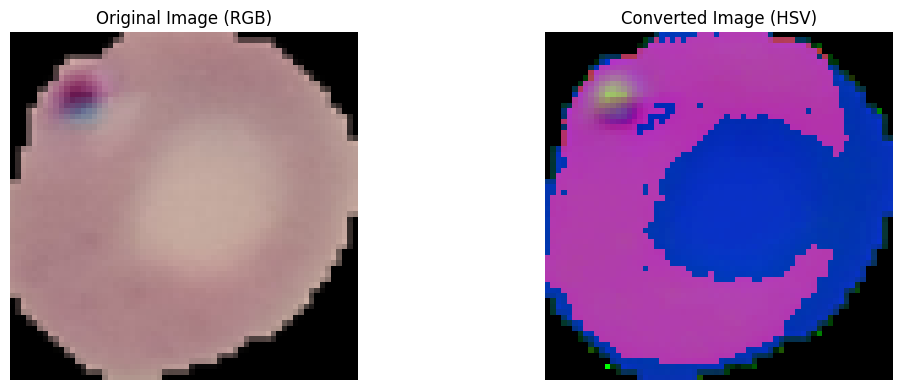

In [ ]:
import matplotlib.pyplot as plt
import cv2  # OpenCV for color space conversion

# Assuming 'img' is one of the images from the dataset
sample_image = train_images[0]  # Replace with your image variable

# Convert to HSV using OpenCV
hsv_image = cv2.cvtColor((sample_image * 255).astype('uint8'), cv2.COLOR_RGB2HSV)

# Visualize the HSV image
plt.figure(figsize=(12, 4))

# Show the original image (assumed to be RGB)
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image (RGB)")
plt.axis('off')

# Show the HSV converted image
plt.subplot(1, 2, 2)
plt.imshow(hsv_image)
plt.title("Converted Image (HSV)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
gfx_train=[]   # to hold the HSV image array

for i in np.arange(0, 24958, 1):
  #a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  hsv_image = cv2.cvtColor((train_images[i] * 255).astype('uint8'), cv2.COLOR_RGB2HSV)

  gfx_train.append(hsv_image)

gfx_train = np.array(gfx_train)

In [ ]:
print(train_images.shape)
print(gfx_train.shape)

(24958, 64, 64, 3)
(24958, 64, 64, 3)


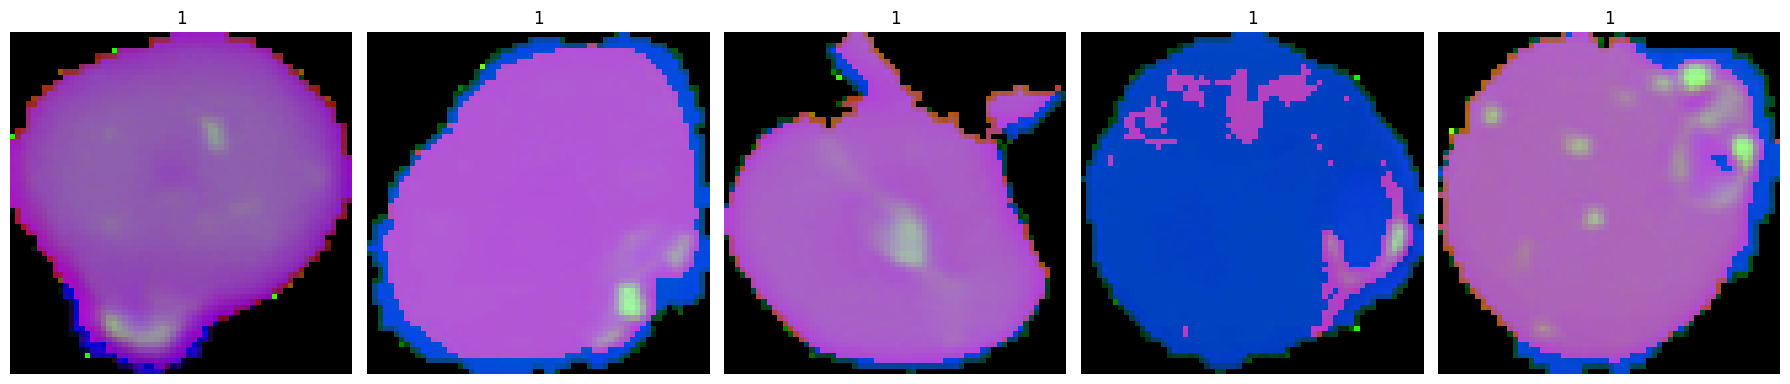

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_train[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Converting the test data

In [ ]:
gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 2600, 1):

  #a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  hsv_image = cv2.cvtColor((test_images[i] * 255).astype('uint8'), cv2.COLOR_RGB2HSV)

  gfx_test.append(hsv_image)

gfx_test = np.array(gfx_test)

In [ ]:
print(gfx.shape)
print(test_images.shape)

(24958, 64, 64, 3)
(2600, 64, 64, 3)


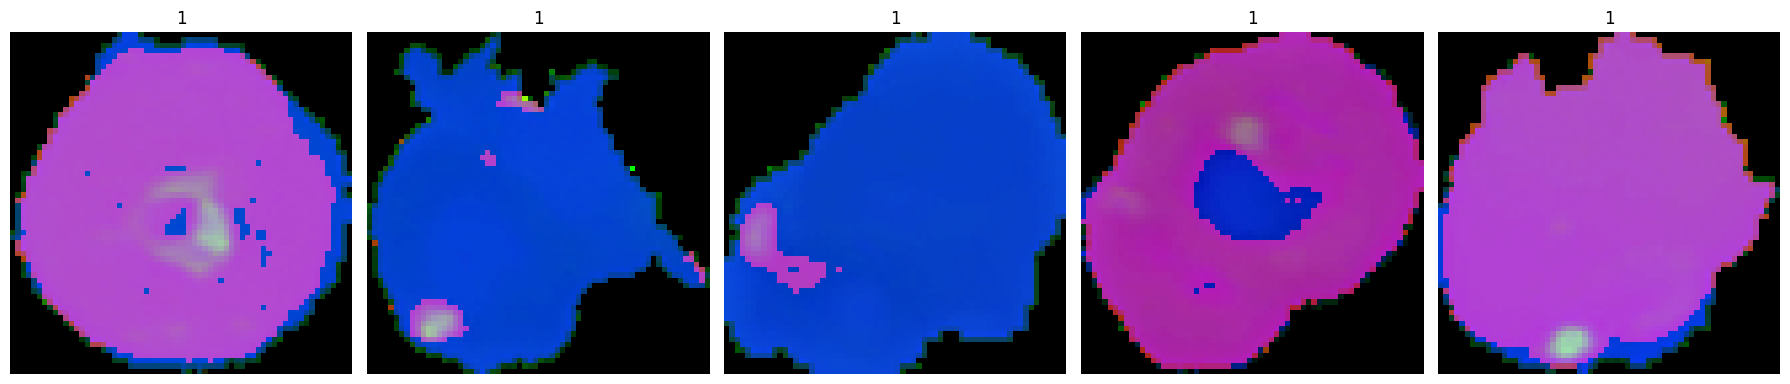

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx_test[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####<b>Observations:</b>
* Bright regions (pink and purple) may indicate the presence of specific features (e.g., parasites or infected areas).
* Blue areas represent the background or less relevant features for analysis.
* Regions of high saturation and brightness stand out, likely corresponding to parasites.
* Non-infected cells have relatively uniform colors with no distinct inclusions.

####<b>Insights:</b>
* HSV is effective in isolating color-based features, making it easier to segment or highlight parasitized regions compared to raw RGB.
* The hue and saturation components can simplify feature extraction for machine learning tasks.
* Preprocessing using HSV may improve model performance by emphasizing relevant features.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data



In [ ]:
# Function to apply Gaussian Blurring on a batch of images
def apply_gaussian_blur(images, kernel_size=(5, 5)):
    blurred_images = []
    for img in images:
        img_uint8 = (img * 255).astype('uint8')  # Convert from float32 [0, 1] to uint8 [0, 255]
        blurred_img = cv2.GaussianBlur(img_uint8, kernel_size, 0)
        blurred_images.append(blurred_img / 255.0)  # Normalize back to [0, 1]
    return np.array(blurred_images, dtype='float32')

# Apply Gaussian Blurring to train images
blurred_train_images = apply_gaussian_blur(train_images)

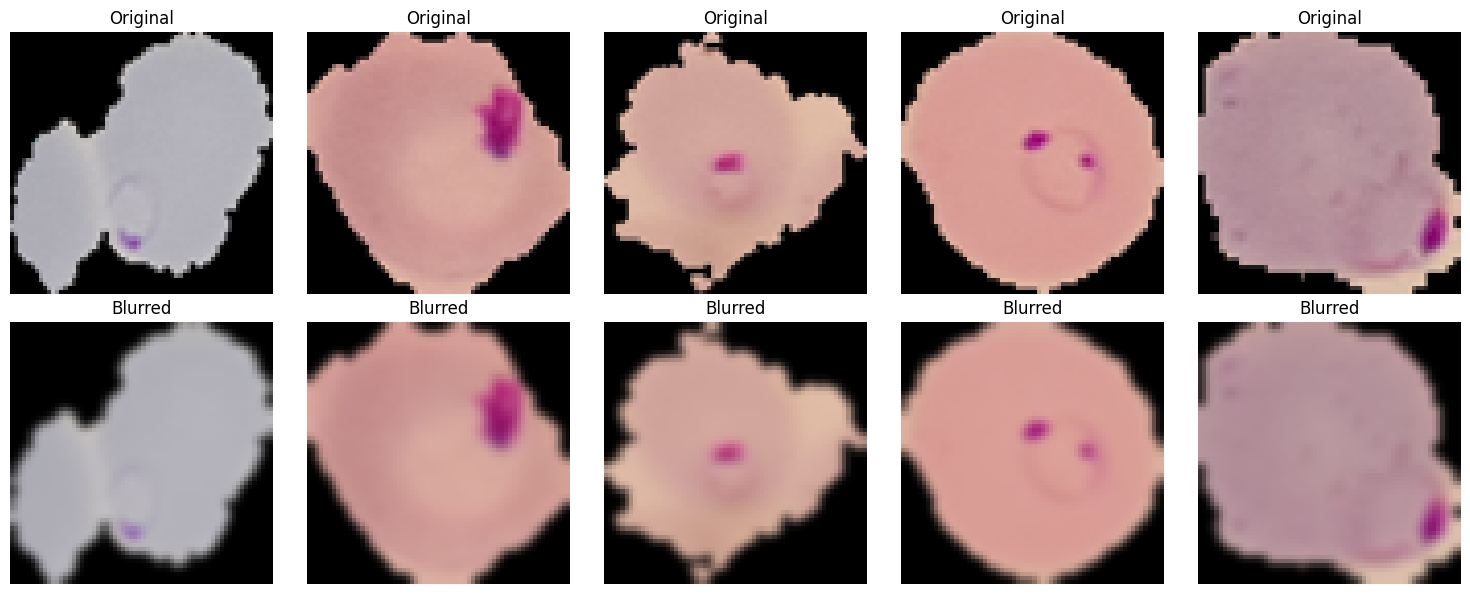

In [ ]:
# Visualize some original and blurred images side by side for comparison
def visualize_blur_effect(original_images, blurred_images, num_samples=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        # Display original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis('off')

        # Display blurred image
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(blurred_images[i])
        plt.title("Blurred")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the blur effect on train images
visualize_blur_effect(train_images, blurred_train_images)


In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)


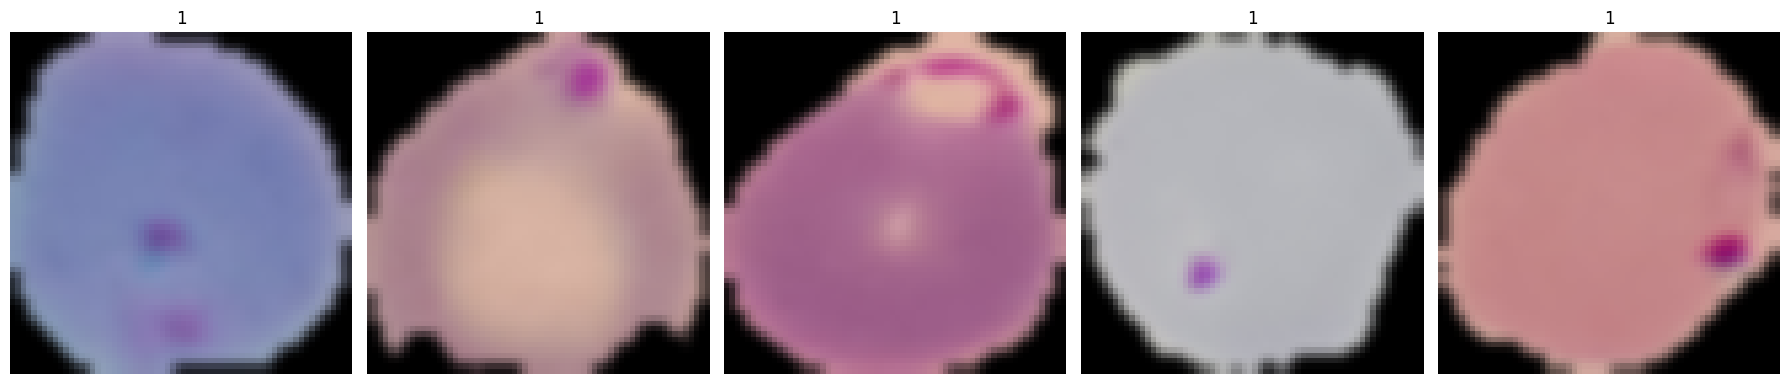

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
# Function to apply Gaussian Blurring on a batch of images
def apply_gaussian_blur(images, kernel_size=(5, 5)):
    blurred_images = []
    for img in images:
        img_uint8 = (img * 255).astype('uint8')  # Convert from float32 [0, 1] to uint8 [0, 255]
        blurred_img = cv2.GaussianBlur(img_uint8, kernel_size, 0)
        blurred_images.append(blurred_img / 255.0)  # Normalize back to [0, 1]
    return np.array(blurred_images, dtype='float32')

# Apply Gaussian Blurring to train images
blurred_train_images = apply_gaussian_blur(test_images)

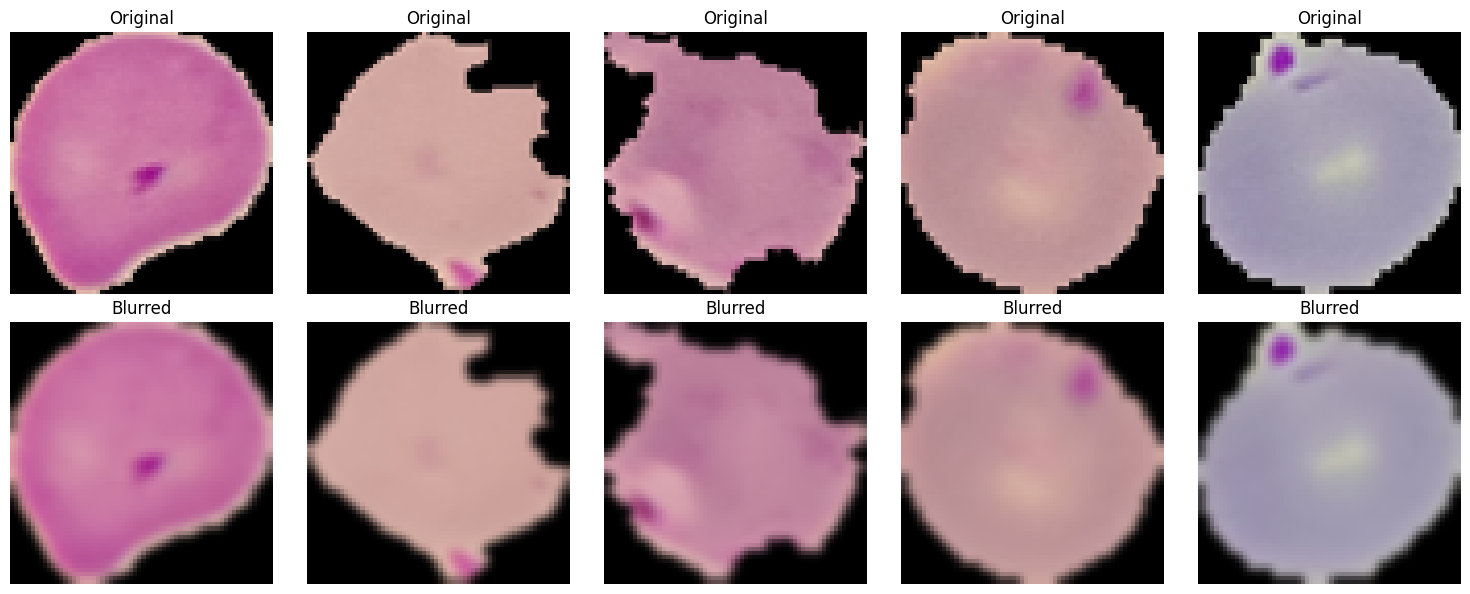

In [ ]:
# Visualize some original and blurred images side by side for comparison
def visualize_blur_effect(original_images, blurred_images, num_samples=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        # Display original image
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis('off')

        # Display blurred image
        plt.subplot(2, num_samples, num_samples + i + 1)
        plt.imshow(blurred_images[i])
        plt.title("Blurred")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize the blur effect on train images
visualize_blur_effect(test_images, blurred_train_images)

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

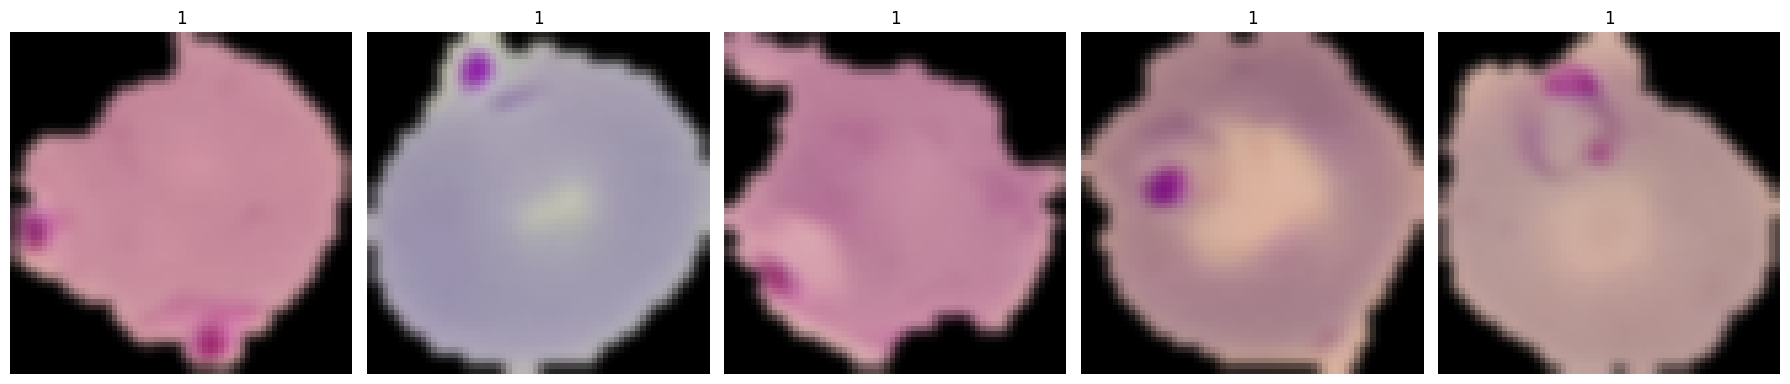

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

####**Observations and insights:**

**Think About It:** Would blurring help us for this problem statement in any way?

* Gaussian blurring has reduced noise and smoothed the cell boundaries and interiors.

* While it has helped to highlight the broader patterns (e.g., cell shape and parasite inclusions), some fine-grained details (critical for detecting smaller inclusions) may have been lost.

**Think About It:** What else can we try?

* Execute some advanced preprocessing techniques like:
  * Image Thresholding: Separating foreground (cells and parasites) from the background.
  * Morphological Operation: Remove small specks or emphasize parasite regions.

* Perform data augmentation:
  * Apply transformations such as rotation, flipping, scaling, or cropping to increase dataset diversity and improve model robustness.
  * Experiment with color augmentations like brightness, contrast, or saturation shifts.

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Tensorflow modules
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential, Model                                            # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import (Dense, Dropout, Flatten, Conv2D,                            # Defining all the layers to build our CNN Model
                                     MaxPooling2D, BatchNormalization, Activation,
                                     Input, LeakyReLU, GlobalAveragePooling2D)
from tensorflow.keras import backend                                                             # importing the backend to free the memory as we train more model
from tensorflow.keras.utils import to_categorical                                                # importing to_categorical for one-hot encoded
from tensorflow.keras.optimizers import Adam, SGD, RMSprop                                       # Importing the optimizers which can be used in our model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses, optimizers                                             # importing EarlyStoping for stoping the training if accuracy is not attained after certain epoch, and MOdelCheck point to save the best model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report                                                    # Importing confusion_matrix to plot the confusion matrix


####<B>One Hot Encoding the train and test labels</B>


In [ ]:
num_classes=2
# Check if labels are already one-hot encoded
if len(train_labels.shape) == 1:  # Labels are not one-hot encoded
    train_labels = to_categorical(train_labels, num_classes=2)
    test_labels = to_categorical(test_labels, num_classes=2)

print(f"Train Labels Shape: {train_labels.shape}")
print(f"Test Labels Shape: {test_labels.shape}")


Train Labels Shape: (24958, 2)
Test Labels Shape: (2600, 2)


###<b> Building the model

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


In [ ]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

model = Sequential([
    # Convolutional layer with 32 filters and a 3x3 kernel
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    # Convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flattening the output
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    # Output layer for binary classification
    Dense(num_classes, activation='softmax')
])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

###<b> Compiling the model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1),  # Fixed extension
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b> Fit and train our Model

In [ ]:
# Train the model with callbacks
history = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)


Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7085 - loss: 1.6943
Epoch 1: val_loss improved from inf to 0.21762, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7087 - loss: 1.6925 - val_accuracy: 0.9840 - val_loss: 0.2176 - learning_rate: 0.0010
Epoch 2/20
614/624 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9664 - loss: 0.1110
Epoch 2: val_loss improved from 0.21762 to 0.21466, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9665 - loss: 0.1108 - val_accuracy: 0.9559 - val_loss: 0.2147 - learning_rate: 0.0010
Epoch 3/20
621/624 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.0832
Epoch 3: val_loss improved from 0.21466 to 0.16964, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9758 - loss: 0.0831 - val_accuracy: 0.9671 - val_loss: 0.1696 - learning_rate: 0.0010
Epoch 4/20
613/624 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9

###<b> Evaluating the model on test data

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loass: {test_loss *100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9854 - loss: 0.0402
Test Accuracy: 98.35%
Test Loass: 6.39%


<b> Plotting the confusion matrix</b>

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.99      0.98      0.98      1300
 Parasitized       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



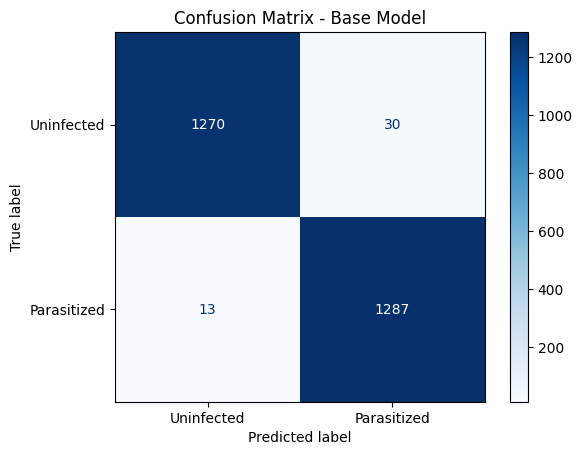

In [ ]:
# Convert to class labels
true_labels = np.argmax(test_labels, axis=1)

# Get predicted labels from the improved model
predicted_probs = model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Classification Report:")
print(class_report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Base Model")
plt.show()

<b>Plotting the train and validation curves

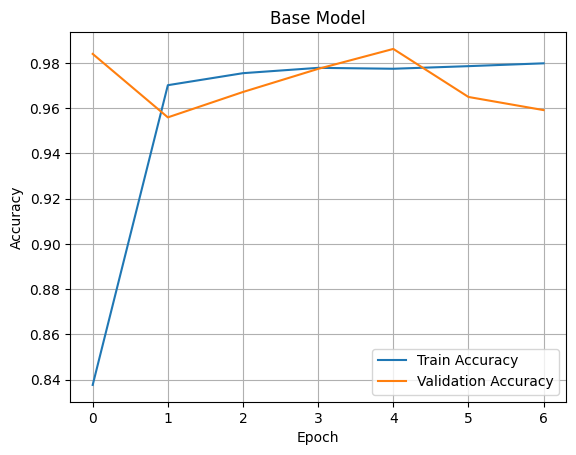

In [ ]:
# Visualize training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


###<b> Building the Model

In [ ]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Improved CNN model
improved_model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Regularization

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fourth convolutional block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Global average pooling instead of flatten
    GlobalAveragePooling2D(),

    # Fully connected dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(2, activation='softmax')  # Binary classification
])

# Display model summary
improved_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │              

 Total params: 489,282 (1.87 MB)

 Trainable params: 488,322 (1.86 MB)

 Non-trainable params: 960 (3.75 KB)

###<b> Compiling the model

In [ ]:
# Compile the model
improved_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('improved_best_model.keras', save_best_only=True, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b>Fit and Train the model

In [ ]:
# Train the model
history = improved_model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7345 - loss: 0.5599
Epoch 1: val_loss improved from inf to 0.00717, saving model to improved_best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.7347 - loss: 0.5596 - val_accuracy: 0.9986 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 2/30
616/624 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9562 - loss: 0.1270
Epoch 2: val_loss did not improve from 0.00717
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9563 - loss: 0.1268 - val_accuracy: 0.9894 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 3/30
622/624 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9710 - loss: 0.0928
Epoch 3: val_loss did not improve from 0.00717
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9710 - loss: 0.0928 - val_accuracy: 0.9928 - val_loss: 0.0215 - learning_rate: 0.0010
Epoch 4/30
622/624 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9727 - loss: 0.0857
Epoch 4: val_loss did not improve from 0.00717

###<b> Evaluating the model

In [ ]:
# Evaluate the model
test_loss, test_accuracy = improved_model.evaluate(test_images, test_labels)
print(f"Improved Model Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Improved Model Test Loss: {test_loss * 100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8044 - loss: 0.5189
Improved Model Test Accuracy: 88.38%
Improved Model Test Loss: 30.69%


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Improved Model Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.81      1.00      0.90      1300
 Parasitized       1.00      0.77      0.87      1300

    accuracy                           0.88      2600
   macro avg       0.91      0.88      0.88      2600
weighted avg       0.91      0.88      0.88      2600



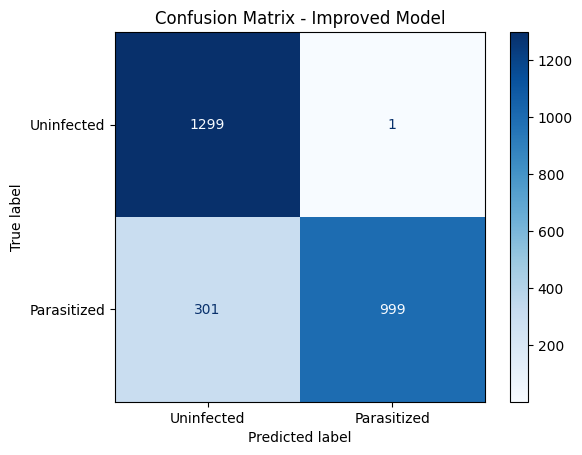

In [ ]:
# Convert to class labels
true_labels = np.argmax(test_labels, axis=1)

# Get predicted labels from the improved model
predicted_probs = improved_model.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Improved Model Classification Report:")
print(class_report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Improved Model")
plt.show()

<b> Plotting the train and the validation curves

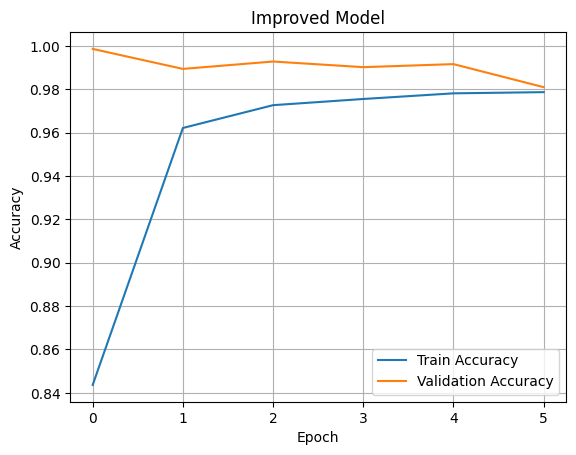

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


In [ ]:
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Build the model
model_with_leakyrelu_bn = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),  # LeakyReLU activation
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Flatten the feature maps for dense layers
    Flatten(),

    # Fully connected layers
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    # Output layer
    Dense(2, activation='softmax')
])

# Display model summary
model_with_leakyrelu_bn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,738 (4.99 MB)

 Trainable params: 1,307,522 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

###<b>Compiling the model

In [ ]:
# Compile the model
model_with_leakyrelu_bn.compile(optimizer=Adam(learning_rate=0.001),
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

<b> Using callbacks

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('model_with_leakyrelu_bn.keras', save_best_only=True, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b>Fit and train the model

In [ ]:
# Train the model
history = model_with_leakyrelu_bn.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7661 - loss: 0.5137
Epoch 1: val_loss improved from inf to 0.00671, saving model to model_with_leakyrelu_bn.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7662 - loss: 0.5134 - val_accuracy: 0.9992 - val_loss: 0.0067 - learning_rate: 0.0010
Epoch 2/30
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9469 - loss: 0.1505
Epoch 2: val_loss did not improve from 0.00671
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9470 - loss: 0.1505 - val_accuracy: 0.9978 - val_loss: 0.0106 - learning_rate: 0.0010
Epoch 3/30
618/624 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9594 - loss: 0.1201
Epoch 3: val_loss did not improve from 0.00671
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9594 - loss: 0.1200 - val_accuracy: 0.9964 - val_loss: 0.0170 - learning_rate: 0.0010
Epoch 4/30
620/624 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9650 - loss: 0.1051
Epoch 4: val_loss did not improve from 0.0

<b>Plotting the train and validation accuracy

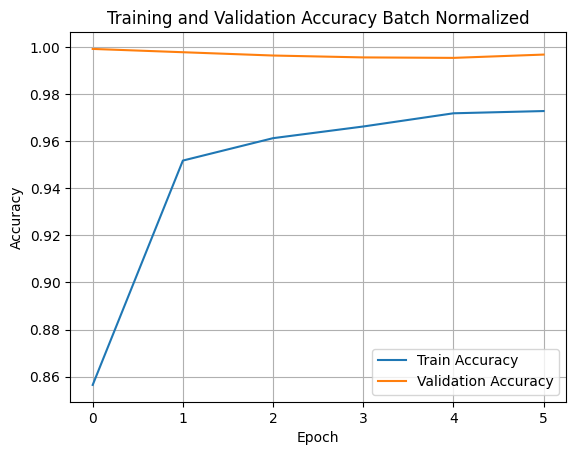

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title('Training and Validation Accuracy Batch Normalized')
plt.show()

###<b>Evaluating the model

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_with_leakyrelu_bn.evaluate(test_images, test_labels)
print(f"Test Accuracy with LeakyReLU and BatchNormalization: {test_accuracy * 100:.2f}%")
print(f"Test Loss with LeakyReLU and BatchNormalization: {test_loss * 100:.2f}%")

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7276 - loss: 0.7087
Test Accuracy with LeakyReLU and BatchNormalization: 83.54%
Test Loss with LeakyReLU and BatchNormalization: 42.84%


<b> Generate the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Batch Normalization Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.75      1.00      0.86      1300
 Parasitized       1.00      0.67      0.80      1300

    accuracy                           0.84      2600
   macro avg       0.88      0.84      0.83      2600
weighted avg       0.88      0.84      0.83      2600



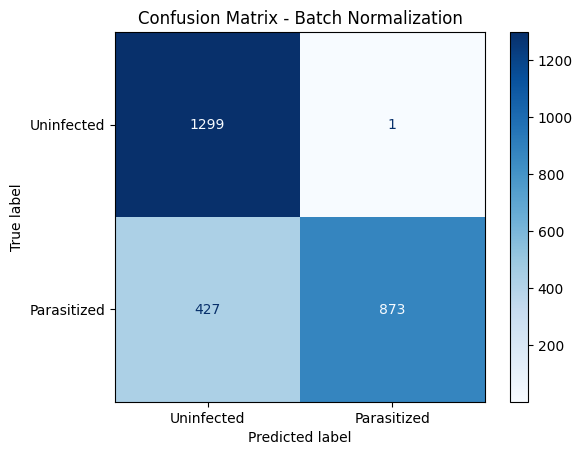

In [ ]:
# convert to class labels
true_labels = np.argmax(test_labels, axis=1)

# Get predicted labels from the improved model
predicted_probs = model_with_leakyrelu_bn.predict(test_images)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Batch Normalization Classification Report:")
print(class_report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Batch Normalization")
plt.show()

####<b>Observations:</b>

<b>Initial Model:</b>

  * Classification Report:
    * High precision, recall, and F1-score for both classes (~98% across metrics).
    * Accuracy of 98% demonstrates strong performance.

  * Confusion Matrix:
    * Only a few misclassifications (e.g., 43 uninfected cells classified as parasitized and 16 parasitized cells as uninfected).

<b>Improved Model:</b>

  * Classification Report:
    * Precision for "Uninfected" improved to 1.00, but recall for "Parasitized" dropped significantly to 0.61.
    * Overall accuracy decreased to 80%.
  * Confusion Matrix:
    * The model failed to balance the performance across classes, with many parasitized cells (510) classified as uninfected.
    * Precision for "Parasitized" remained high but with poor recall, leading to more false negatives.

<b>Batch Normalization:</b>

* Classification Report:
  * Marginal improvement compared to the "Improved Model."
  * Accuracy increased slightly to 81%.
  * Recall for "Parasitized" improved to 0.62, with similar precision as the "Improved Model."
* Confusion Matrix:
    * Reduction in false negatives for parasitized cells (495 compared to 510), indicating slightly better balance.

####<b>Insights:</b>
<b>Initial Model:</b>

* Performs well with balanced performance across both classes.
* Few misclassifications suggest it could already be sufficient for deployment.

<b>Improved Model:</b>

* Overfits to the "Uninfected" class, achieving perfect precision and recall at the cost of parasitized cell detection.
* This imbalance could have been introduced due to biased data, changes in preprocessing, or model adjustments.

<b>Batch Normalization:</b>

* Marginally improves class balance compared to the "Improved Model."
* Still suffers from poor recall for parasitized cells, though slightly better than the "Improved Model."

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


###<b> Use image data generator



In [ ]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define the ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For the validation set, we only rescale the images (no augmentation)
val_datagen = ImageDataGenerator()

# Fit the generator to the training data
train_datagen.fit(X_train)

# Create generators for training and validation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


####<B>Visualizing Augmented images

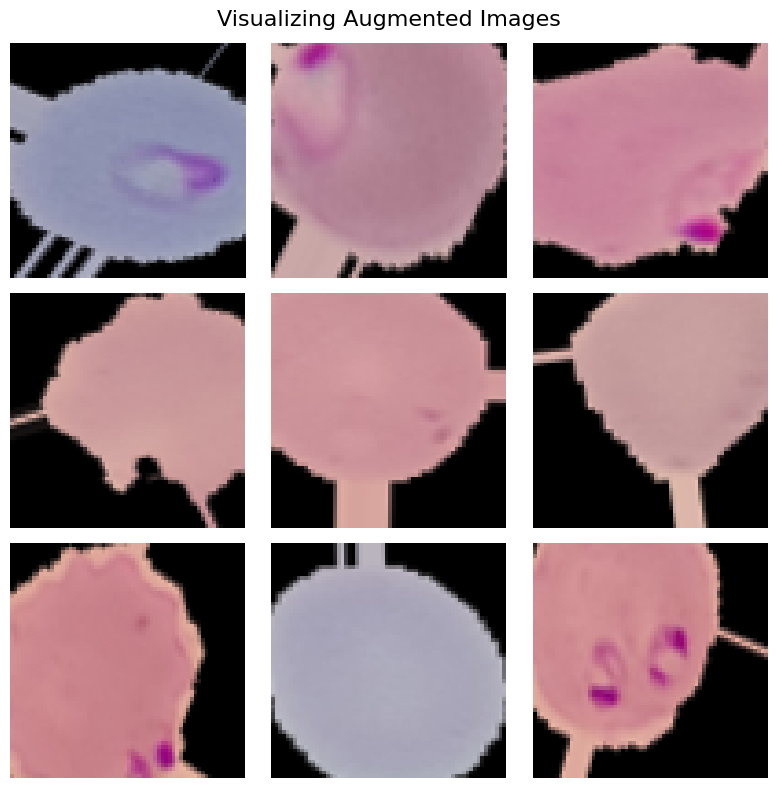

In [ ]:
# Visualize some augmented images
augmented_images, augmented_labels = next(train_generator)

plt.figure(figsize=(8, 8))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Visualizing Augmented Images", fontsize=16)
plt.tight_layout()
plt.show()


###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<b>Observations:</b>
* Despite augmentations, critical features (e.g., parasitized cells' purple spots) are preserved, which helps the model focus on learning important patterns.

* Augmented images create diversity in the training data, making the model more robust to overfitting.

* The augmented images remain clear and usable for training. There is no excessive distortion that might confuse the model.

####<b>Insights:</b>
* Augmentation helps reduce overfitting by teaching the model to generalize better across a wider range of scenarios.

* Augmentation ensures that both "uninfected" and "parasitized" classes are represented in varied conditions, improving classification performance.

* If some parasitic features are subtle, aggressive augmentations (e.g., excessive rotation or scaling) might obscure them. Careful tuning is necessary to balance augmentation strength.

###<b>Building the Model

In [ ]:
# Build the CNN model with LeakyReLU and BatchNormalization
model_augument = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),  # LeakyReLU activation
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Flatten the feature maps for dense layers
    Flatten(),

    # Fully connected dense layers
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    # Output layer for binary classification
    Dense(2, activation='softmax')
])

# Compile the model
model_augument.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model_augument.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,738 (4.99 MB)

 Trainable params: 1,307,522 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

<b>Using Callbacks

In [ ]:
# Define callbacks
callbacks = [
    # Stop training early if validation loss doesn't improve for 5 epochs
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),

    # Save the best model during training
    ModelCheckpoint('best_model_with_callbacks.keras', save_best_only=True, monitor='val_loss', verbose=1),

    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b> Fit and Train the model

In [ ]:
# Train the model using the defined callbacks
history = model_augument.fit(
    train_generator,  # Augmented training data
    validation_data=val_generator,  # Validation data
    epochs=30,  # Max number of epochs
    batch_size=32, # Number of augmented samples
    callbacks=callbacks
)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6289 - loss: 0.7599
Epoch 1: val_loss improved from inf to 0.87438, saving model to best_model_with_callbacks.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6290 - loss: 0.7596 - val_accuracy: 0.6601 - val_loss: 0.8744 - learning_rate: 0.0010
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8836 - loss: 0.3028
Epoch 2: val_loss improved from 0.87438 to 0.29996, saving model to best_model_with_callbacks.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8836 - loss: 0.3027 - val_accuracy: 0.8880 - val_loss: 0.3000 - learning_rate: 0.0010
Epoch 3/30
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9107 - loss: 0.2506
Epoch 3: val_loss improved from 0.29996 to 0.15480, saving model to best_model_with_callbacks.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9107 - loss: 0.2505 - val_accuracy: 0.9395 - val_loss: 0.1548 - learning_rate: 0.0010
Epoch 4/30
619

###<B>Evaluating the model

<b>Plot the train and validation accuracy

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model_augument.evaluate(val_generator)
print(f"Validation Accuracy with Callbacks: {val_accuracy * 100:.2f}%")
print(f"Validation Loss with Callbacks: {val_loss * 100:.2f}%")


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9763 - loss: 0.0699
Validation Accuracy with Callbacks: 97.56%
Validation Loss with Callbacks: 6.69%


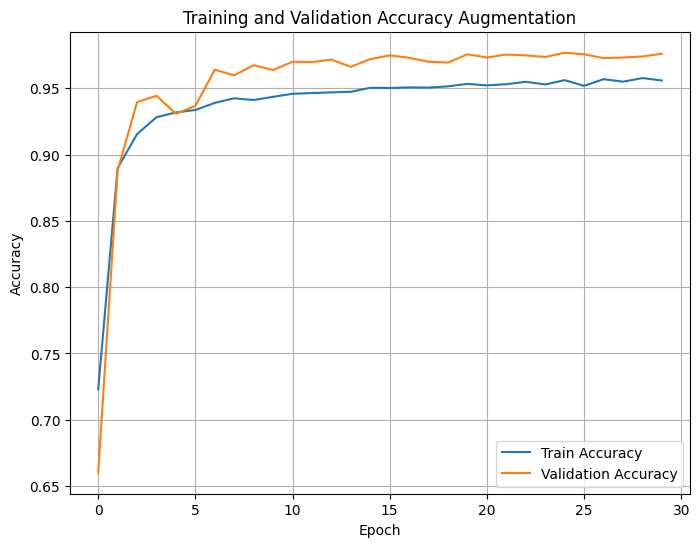

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Augmentation')
plt.legend()
plt.grid()
plt.show()


<B>Plotting the classification report and confusion matrix

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.49      0.50      0.49      2442
 Parasitized       0.51      0.50      0.51      2550

    accuracy                           0.50      4992
   macro avg       0.50      0.50      0.50      4992
weighted avg       0.50      0.50      0.50      4992



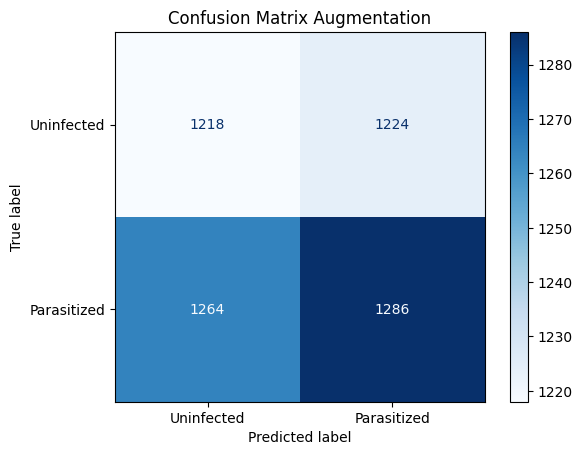

In [ ]:
# Get true labels for validation data
true_labels = np.argmax(y_val, axis=1)

# Get predictions for validation data
val_predictions = model_augument.predict(val_generator)
predicted_labels = np.argmax(val_predictions, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix Augmentation")
plt.show()


######<b> Using different Datagenerator parameters for perfomance improvement</b>

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


In [ ]:
# Checking  the minimum and maximum pixel values for normalization
# Check the pixel value range for training images
train_min_pixel = X_train.min()
train_max_pixel = X_train.max()
print(f"Train Images - Min Pixel Value: {train_min_pixel}, Max Pixel Value: {train_max_pixel}")

# Check the pixel value range for testing images
test_min_pixel = X_val.min()
test_max_pixel = X_val.max()
print(f"Test Images - Min Pixel Value: {test_min_pixel}, Max Pixel Value: {test_max_pixel}")

Train Images - Min Pixel Value: 0.0, Max Pixel Value: 1.0
Test Images - Min Pixel Value: 0.0, Max Pixel Value: 1.0


In [ ]:
# Define the updated ImageDataGenerator with optimized augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,        # Slightly reduce rotation range to avoid distorting key features
    width_shift_range=0.15,    # Reduce width shifts to preserve spatial information
    height_shift_range=0.15,   # Reduce height shifts
    shear_range=0.1,         # Reduce shearing to prevent excessive deformation
    zoom_range=0.1,           # Slightly reduce zoom range
    horizontal_flip=True,     # Keep horizontal flipping
    fill_mode='nearest'       # Fill in new pixels after transformation
)

# For the validation set, we only rescale the images (no augmentation)
val_datagen = ImageDataGenerator()

# Fit the generator to the training data
train_datagen.fit(X_train)

# Create generators for training and validation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32, shuffle=True)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32, shuffle=False)

####<B>Visualizing New Augmented images

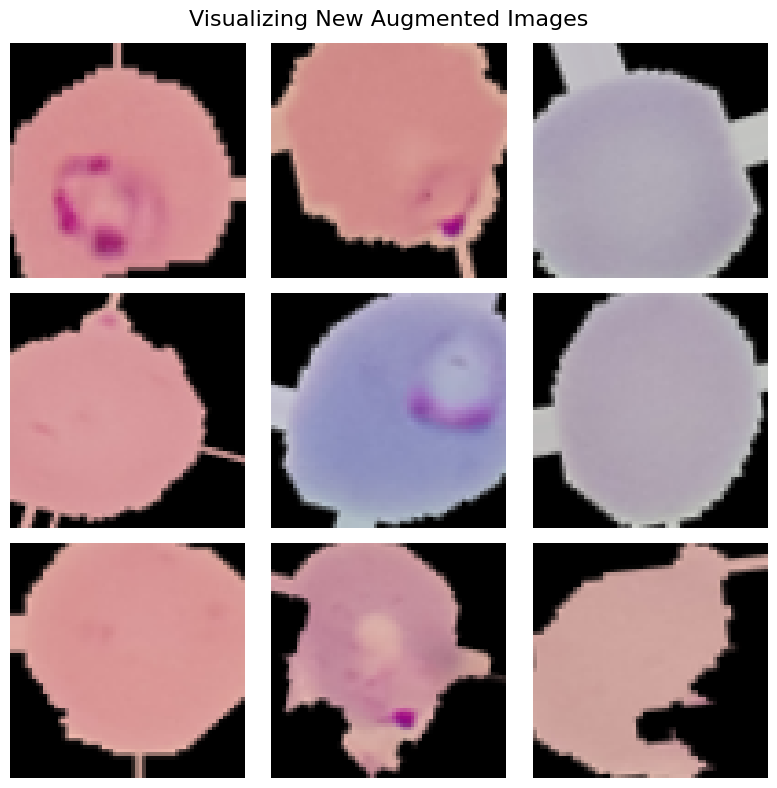

In [ ]:
# Visualize some augmented images
augmented_images, augmented_labels = next(train_generator)

plt.figure(figsize=(8, 8))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Visualizing New Augmented Images", fontsize=16)
plt.tight_layout()
plt.show()

#Building New Augmentation Model

In [ ]:
# Build the CNN model with LeakyReLU and BatchNormalization
model_augument_1 = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),  # LeakyReLU activation
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Flatten the feature maps for dense layers
    Flatten(),

    # Fully connected dense layers
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    # Output layer for binary classification
    Dense(2, activation='softmax')
])

# Display model summary
model_augument_1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,738 (4.99 MB)

 Trainable params: 1,307,522 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

<b>Compile The Model

In [ ]:
# Compile the model
model_augument_1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b> Using callback

In [ ]:
# Define Callbacks
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop training if no improvement for 5 epochs
        verbose=1,
        restore_best_weights=True  # Restore weights from the epoch with the best validation loss
    ),

    # Save the best model during training
    ModelCheckpoint(
        'best_model.keras',    # Filepath to save the best model
        monitor='val_loss',  # Save model with the lowest validation loss
        save_best_only=True, # Save only the best weights
        verbose=1
    ),

    # Reduce learning rate on plateau
    ReduceLROnPlateau(
        monitor='val_loss',  # Monitor validation loss
        factor=0.2,          # Reduce learning rate by a factor of 0.2
        patience=3,          # If no improvement for 3 epochs, reduce learning rate
        verbose=1
    )
]


<b>Train the model with callbacks</b>

In [ ]:
# Train the model with callbacks
history = model_augument_1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,  # Number of epochs
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=callbacks  # Add callbacks here
)

Epoch 1/25
618/624 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6949 - loss: 0.6573
Epoch 1: val_loss improved from inf to 0.47165, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.6961 - loss: 0.6552 - val_accuracy: 0.8528 - val_loss: 0.4716 - learning_rate: 0.0010
Epoch 2/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/25
619/624 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9174 - loss: 0.2270
Epoch 3: val_loss improved from 0.47165 to 0.19919, saving model to best_model.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9174 - loss: 0.2268 - val_accuracy: 0.9219 - val_loss: 0.1992 - learning_rate: 0.0010
Epoch 4/25
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/25
618/624 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9381 - loss: 0.1755
Epoch 5: val_loss improved from 0.19919 to 0.0901

###<B>Evaluating the model</B>

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model_augument_1.evaluate(val_generator, steps=len(val_generator))
print(f"Validation Loss: {val_loss *100:.4f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.4f}%")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9785 - loss: 0.0717
Validation Loss: 7.0251%
Validation Accuracy: 97.6963%


<b>Plot the train and validation accuracy

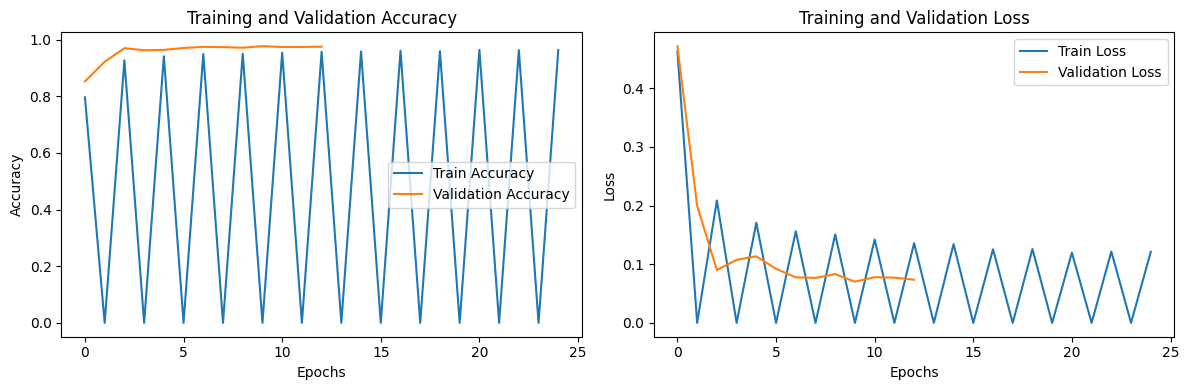

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


<B>Plotting the classification report and confusion matrix

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.97      0.99      0.98      2442
 Parasitized       0.99      0.97      0.98      2550

    accuracy                           0.98      4992
   macro avg       0.98      0.98      0.98      4992
weighted avg       0.98      0.98      0.98      4992



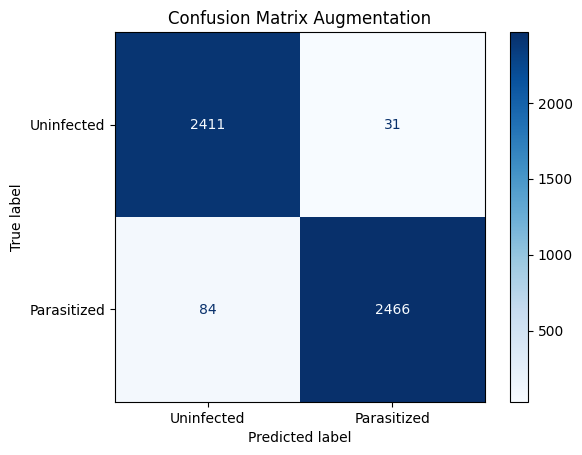

In [ ]:
# Get true labels for validation data
true_labels = np.argmax(y_val, axis=1)

# Get predictions for validation data
val_predictions = model_augument_1.predict(val_generator)
predicted_labels = np.argmax(val_predictions, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix Augmentation")
plt.show()


<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications import VGG16
# Load the VGG16 model, choosing up to the last convolutional block
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze all layers in the pre-trained model
for layer in vgg16_base.layers:
    layer.trainable = False

# Add fully connected layers on top of the pre-trained model
model_vgg16 = Sequential([
    vgg16_base,  # Pre-trained VGG16 base
    Flatten(),   # Flatten the feature maps

    # Fully connected layers
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output layer for binary classification
    Dense(2, activation='softmax')  # Binary classification
])

# Display model summary
model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,273,922 (58.27 MB)

 Trainable params: 558,466 (2.13 MB)

 Non-trainable params: 14,715,456 (56.14 MB)

###<b>Compiling the model

In [ ]:
# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b> using callbacks

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('vgg16_custom_fc.keras', save_best_only=True, monitor='val_loss', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b>Fit and Train the model

In [ ]:
# Train the model
history = model_vgg16.fit(
    train_generator,  # Training data with augmentation
    validation_data=val_generator,  # Validation data
    epochs=30,
    batch_size=32, # Number of augmented samples
    callbacks=callbacks
)

Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8157 - loss: 0.4680
Epoch 1: val_loss improved from inf to 0.27702, saving model to vgg16_custom_fc.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.8158 - loss: 0.4678 - val_accuracy: 0.8954 - val_loss: 0.2770 - learning_rate: 0.0010
Epoch 2/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8978 - loss: 0.2604
Epoch 2: val_loss improved from 0.27702 to 0.20613, saving model to vgg16_custom_fc.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.8978 - loss: 0.2605 - val_accuracy: 0.9191 - val_loss: 0.2061 - learning_rate: 0.0010
Epoch 3/30
621/624 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8935 - loss: 0.2688
Epoch 3: val_loss improved from 0.20613 to 0.15838, saving model to vgg16_custom_fc.keras
624/624 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.8935 - loss: 0.2687 - val_accuracy: 0.9379 - val_loss: 0.1584 - learning_rate: 0.0010
Epoch 4/30
623/624 ━━━━━━━━━━━━━━━━━━━━ 0s 4

<b>Plot the train and validation accuracy

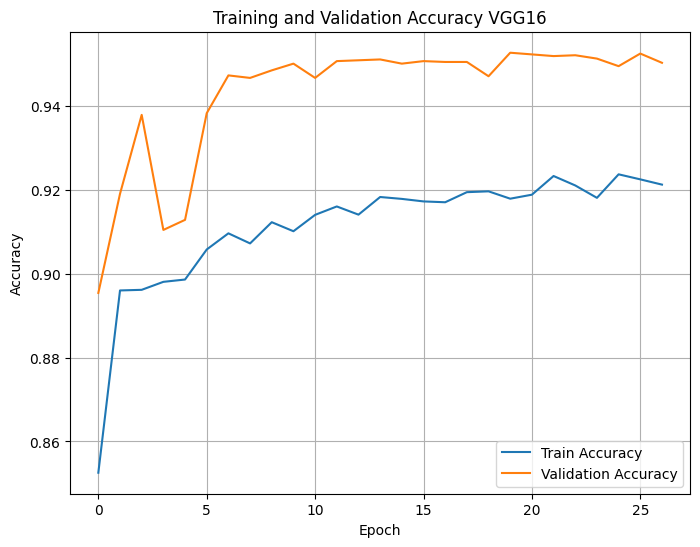

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy VGG16')
plt.legend()
plt.grid(True)
plt.show()


###**Observations and insights:**

*   What can be observed from the validation and train curves?

    * The validation accuracy shows significant fluctuation in the early epochs (e.g., around epoch 5-10). This suggests the model might be sensitive to early weights or hyperparameter initialization.

    * The training accuracy shows a steady upward trend, stabilizing around 89-90%. This indicates the model is learning but might have reached its capacity with the current architecture.

    * After the initial fluctuation, the validation accuracy stabilizes around 94-95%. This suggests the model is not overfitting and is robust on unseen data.

    * The gap between training (90%) and validation accuracy (94-95%) indicates there may still be room for improvement, potentially by fine-tuning pre-trained layers or increasing the complexity of the model.


###<b> Evaluating the model

In [ ]:
# Evaluate the model on validation data
val_loss, val_accuracy = model_vgg16.evaluate(val_generator)
print(f"Validation Accuracy with VGG16 and Custom Fully Connected Layers: {val_accuracy * 100:.2f}%")
print(f"Validation Loss with VGG16 and Custom Fully Connected Layers: {val_loss * 100:.2f}%")



156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9518 - loss: 0.1253
Validation Accuracy with VGG16 and Custom Fully Connected Layers: 95.19%
Validation Loss with VGG16 and Custom Fully Connected Layers: 12.65%


<b>Plotting the classification report and confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

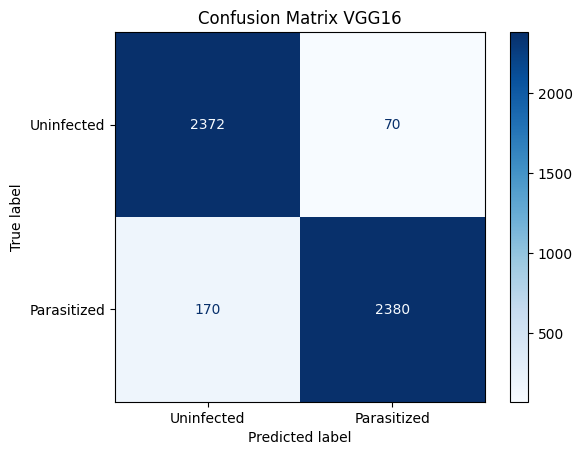

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Incremental prediction
predicted_labels = []
true_labels = []
for i in range(len(val_generator)):
    x_batch, y_batch = val_generator[i]
    batch_predictions = model_vgg16.predict(x_batch)
    predicted_labels.extend(np.argmax(batch_predictions, axis=1))
    true_labels.extend(np.argmax(y_batch, axis=1))

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Generate classification report
#class_report = classification_report(true_labels, predicted_labels, target_names=val_generator.class_indices.keys())
#print("Classification Report:")
#print(class_report)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Classification Report:")
print(class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix VGG16")
plt.show()

###<b>Think about it:</b>
**What observations and insights can be drawn from the confusion matrix and classification report?**

* True Positives (Parasitized correctly predicted):

    * 2300s parasitized samples were correctly classified as parasitized.
      This indicates that the model performs well in identifying parasitized cells.
* True Negatives (Uninfected correctly predicted):

    * 2300s uninfected samples were correctly classified as uninfected.
      The model has a strong ability to detect uninfected cells.

* False Positives (Uninfected misclassified as parasitized):
    * Some uninfected samples were misclassified as parasitized.
      The low number of false positives indicates that the model has a high precision for the parasitized class.

* False Negatives (Parasitized misclassified as uninfected):
    * Some parasitized samples were misclassified as uninfected.
      This is a slightly higher number than the false positives, suggesting that the model is somewhat conservative in detecting parasitized cells.
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model:</b>
* The pre-trained VGG16 architecture excels in feature extraction due to its rich hierarchical structure and transfer learning capabilities.
* Its performance highlights the importance of robust architectures over poorly implemented augmentations.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
  * Yes, the performance of the VGG16 model can be improved or matched using other pre-trained models or custom CNN architectures. Here are some strategies and architectures to consider:

  **Modedels:**
    * ResNet (Residual Networks): It is designed to address vanishing gradient issues in deep networks.And it is excellent for datasets with subtle differences, like parasitized vs. uninfected cells.
    * EfficientNet: Combines model scaling with efficiency, providing a good balance between accuracy and computational cost. It is suitable on medical datasets with high resolution.

  **CNN Architectures:**
    * Hybrid Architectures: It is combining pre-trained backbones (e.g., ResNetwork) with custom layers (e.g., fully connected or attention layer) for task-specific optimization.
    * Attention Mechanisms: Adding attention modules (e.g., SE-Block or CBAM) to help the network focus on parasitic regions or critical areas.

*  You can try to build a model using these HSV images and compare them with your other models.

<b>Prepare the Dataset</b>

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(gfx_train, train_labels, test_size=0.2, random_state=42) # Split data
# Normalize the data
#X_train = np.array(X_train) / 255.0
#X_val = np.array(X_val) / 255.0


####<B>Normalize  the train and test labels</B>

In [ ]:
# Ensure data type is float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

# Normalize the images
X_train /= 255.0
X_val /= 255.0

# Check shapes and data types
print("Train images data type:", X_train.dtype)
print("Test images data type:", X_val.dtype)

# Print the min and max values after normalization
print(f"After Normalization - Train Min: {X_train.min():.4f}, Max: {X_train.max():.4f}")
print(f"After Normalization - Test Min: {X_val.min():.4f}, Max: {X_val.max():.4f}")

Train images data type: float32
Test images data type: float32
After Normalization - Train Min: 0.0000, Max: 1.0000
After Normalization - Test Min: 0.0000, Max: 1.0000


####<B>One Hot Encoding the train and test labels</B>

In [ ]:
num_classes=2
# Check if labels are already one-hot encoded
if len(train_labels.shape) == 1:  # Labels are not one-hot encoded
    y_train = to_categorical(y_train, num_classes=2)
    y_val = to_categorical(y_val, num_classes=2)

print(f"Train Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_val.shape}")

Train Labels Shape: (19966, 2)
Test Labels Shape: (4992, 2)


<b>Let explore the data and ensure they are ready for model

(19966, 64, 64, 3)
(4992, 64, 64, 3)
1.0
1.0


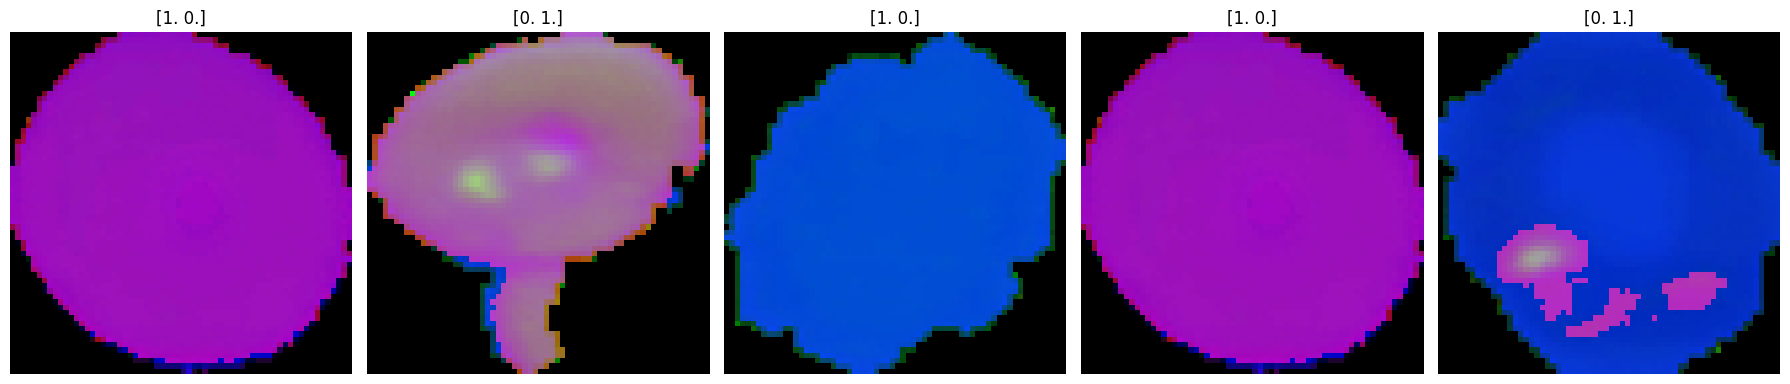

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_train.max())
print(X_val.max())

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = y_train[i]

  ax[t].set_title(Title)

  ax[t].imshow(X_train[i])

  ax[t].set_axis_off()

  fig.tight_layout()

<b>Build a model using these HSV images and compare them with your other models.</b>

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


In [ ]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

model_hsv = Sequential([
    # Convolutional layer with 32 filters and a 3x3 kernel
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    # Convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flattening the output
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    # Output layer for binary classification
    Dense(num_classes, activation='softmax')
])

# Display the model summary
model_hsv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

######<b>Compiling The Model</b>

In [ ]:
# Compile the model
model_hsv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b> Using Callback

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1),  # Fixed extension
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b> Fit and train HSV Model

In [ ]:
# Train the model with callbacks
history = model_hsv.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7697 - loss: 0.4478
Epoch 1: val_loss improved from inf to 0.10433, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7700 - loss: 0.4474 - val_accuracy: 0.9664 - val_loss: 0.1043 - learning_rate: 0.0010
Epoch 2/20
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9751 - loss: 0.0855
Epoch 2: val_loss improved from 0.10433 to 0.08485, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9751 - loss: 0.0854 - val_accuracy: 0.9780 - val_loss: 0.0848 - learning_rate: 0.0010
Epoch 3/20
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9796 - loss: 0.0607
Epoch 3: val_loss improved from 0.08485 to 0.06945, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9796 - loss: 0.0607 - val_accuracy: 0.9762 - val_loss: 0.0695 - learning_rate: 0.0010
Epoch 4/20
494/500 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.

###<b> Evaluating the model on test data</b>

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_hsv.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loass: {test_loss *100:.2f}%")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.0598
Test Accuracy: 97.88%
Test Loass: 6.32%


<b> Plotting the confusion matrix</b>

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
HSV Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.97      0.98      0.98      2442
 Parasitized       0.98      0.97      0.98      2550

    accuracy                           0.98      4992
   macro avg       0.98      0.98      0.98      4992
weighted avg       0.98      0.98      0.98      4992



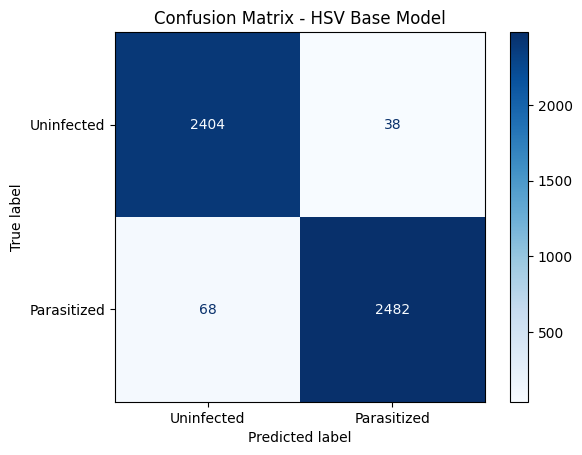

In [ ]:
# Convert to class labels
true_labels = np.argmax(y_val, axis=1)

# Get predicted labels from the improved model
predicted_probs = model_hsv.predict(X_val)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("HSV Classification Report:")
print(class_report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - HSV Base Model")
plt.show()

<b>Plotting the train and validation curves</b>



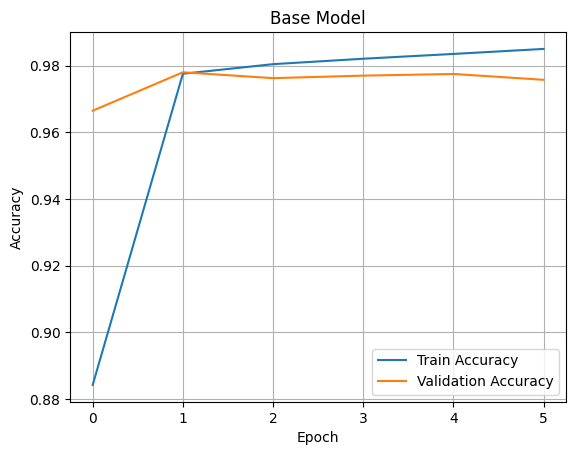

In [ ]:
# Visualize training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Base Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

<b>Observation</b>

* In the first epoch, there is a significant increase in both training and validation accuracy. This indicates that the model is learning quickly and adapting to the data.
* After the first epoch, both the training and validation accuracy plateau, with minimal changes over subsequent epochs.
* This suggests the model has converged quickly, reaching near-optimal performance by epoch 2

**Insights**
* The model's ability to achieve high accuracy within a few epochs suggests that the architecture and dataset are well-aligned.
* Early stopping may be a good strategy to prevent unnecessary training beyond epoch 2-3
* The slight divergence between training and validation accuracy could imply mild overfitting, especially if the gap widens in further epochs.



<b> HSV Data Augumentation </b>

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


###<b> Use image data generator

In [ ]:
# Define the ImageDataGenerator with augmentation
hsv_train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For the validation set, we only rescale the images (no augmentation)
hsv_val_datagen = ImageDataGenerator()

# Fit the generator to the training data
hsv_train_datagen.fit(X_train)

# Create generators for training and validation
hsv_train_generator = hsv_train_datagen.flow(X_train, y_train, batch_size=32)
hsv_val_generator = hsv_val_datagen.flow(X_val, y_val, batch_size=32)

<b>Visualize</b>

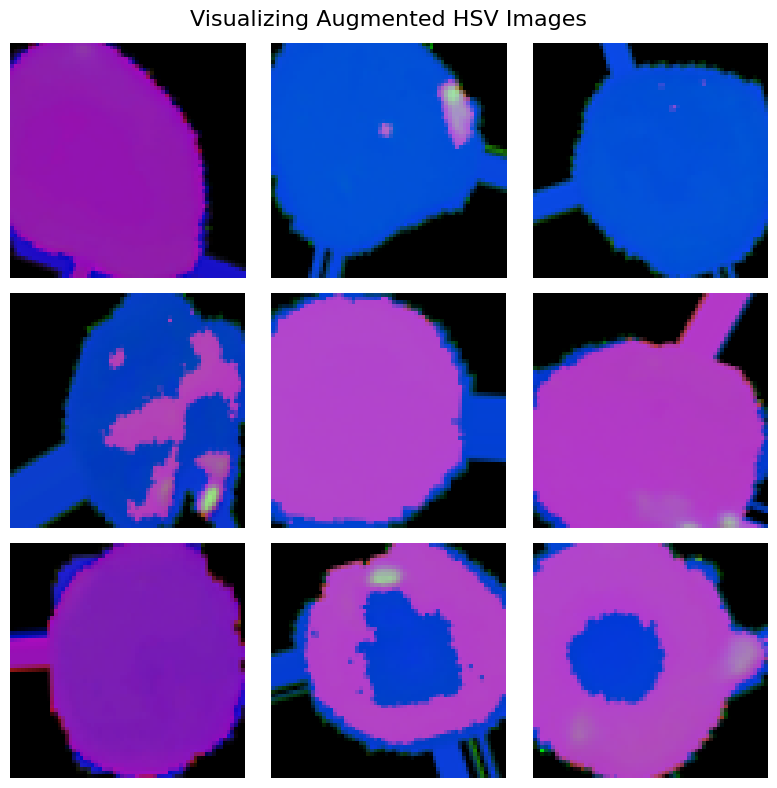

In [ ]:
# Visualize some augmented images
augmented_images, augmented_labels = next(hsv_train_generator)

plt.figure(figsize=(8, 8))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Visualizing Augmented HSV Images", fontsize=16)
plt.tight_layout()
plt.show()

<b>Observations:</b>

* The augmented images seem to retain the key features of the original images, with added variations to simulate different lighting and color conditions.
* Augmentations appear consistent across images, ensuring that the transformations are applied uniformly.

<b>Insight</b>
* The diversity introduced through augmentation can make the model more robust to unseen data by preventing overfitting to specific patterns or lighting conditions.

<b>Build HSV Augmentation Model</b>

In [ ]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Build the CNN model with LeakyReLU and BatchNormalization
hsv_model_augument = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),  # LeakyReLU activation
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Flatten the feature maps for dense layers
    Flatten(),

    # Fully connected dense layers
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    # Output layer for binary classification
    Dense(2, activation='softmax')
])

# Display model summary
hsv_model_augument.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,738 (4.99 MB)

 Trainable params: 1,307,522 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

<b> Compiling The Model</b>

In [ ]:
# Compile the model
hsv_model_augument.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b>Using callback</b>

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1),  # Fixed extension
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b> Fit and train HSV Model

In [ ]:
# Train the model with callbacks
history = hsv_model_augument.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7028 - loss: 0.6016
Epoch 1: val_loss improved from inf to 0.31750, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7030 - loss: 0.6012 - val_accuracy: 0.9001 - val_loss: 0.3175 - learning_rate: 0.0010
Epoch 2/20
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9416 - loss: 0.1646
Epoch 2: val_loss improved from 0.31750 to 0.18961, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9417 - loss: 0.1645 - val_accuracy: 0.9434 - val_loss: 0.1896 - learning_rate: 0.0010
Epoch 3/20
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9561 - loss: 0.1256
Epoch 3: val_loss improved from 0.18961 to 0.13558, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9561 - loss: 0.1255 - val_accuracy: 0.9592 - val_loss: 0.1356 - learning_rate: 0.0010
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0

<b>Evaluate the model</b>

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = hsv_model_augument.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loass: {test_loss *100:.2f}%")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0726
Test Accuracy: 97.54%
Test Loass: 8.15%


<b> Plotting the confusion matrix</b>

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
HSV Augmentation Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.96      0.99      0.98      2442
 Parasitized       0.99      0.96      0.98      2550

    accuracy                           0.98      4992
   macro avg       0.98      0.98      0.98      4992
weighted avg       0.98      0.98      0.98      4992



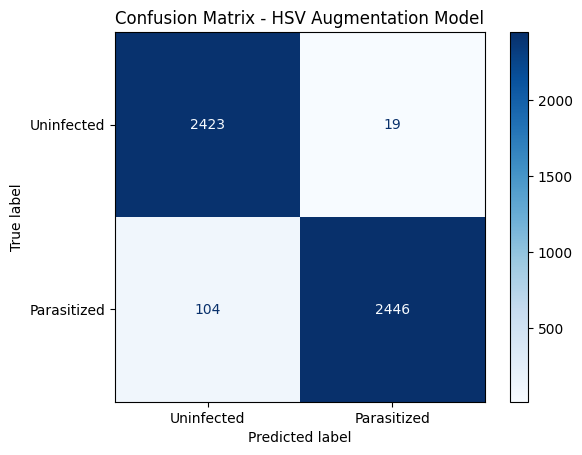

In [ ]:
# Convert to class labels
true_labels = np.argmax(y_val, axis=1)

# Get predicted labels from the improved model
predicted_probs = hsv_model_augument.predict(X_val)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("HSV Augmentation Classification Report:")
print(class_report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - HSV Augmentation Model")
plt.show()

<b>Plotting the train and validation curves</b>:

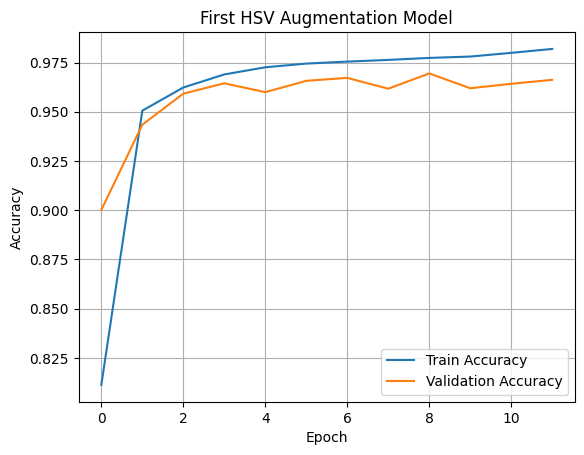

In [ ]:
# Visualize training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('First HSV Augmentation Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

###<b> Use image data generator with different parameters for improvement

In [ ]:
from tensorflow.keras import backend as K

def clean_backend():
    """
    Function to clear the TensorFlow/Keras backend and reset the session.
    This helps avoid memory buildup and ensures a clean state for experiments.
    """
    # Clear the Keras backend
    K.clear_session()

    # Reset TensorFlow's default graph (if needed)
    tf.compat.v1.reset_default_graph()  # For TensorFlow 1.x compatibility
    print("Backend cleaned and reset.")

# Call this function before defining or training a new model
clean_backend()

Backend cleaned and reset.


In [ ]:
# Define the ImageDataGenerator with augmentation
hsv_train_datagen1 = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For the validation set, we only rescale the images (no augmentation)
hsv_val_datagen1 = ImageDataGenerator()

# Fit the generator to the training data
hsv_train_datagen1.fit(X_train)

# Create generators for training and validation
hsv_train_generator1 = hsv_train_datagen1.flow(X_train, y_train, batch_size=32)
hsv_val_generator1 = hsv_val_datagen1.flow(X_val, y_val, batch_size=32)

<b>View Image

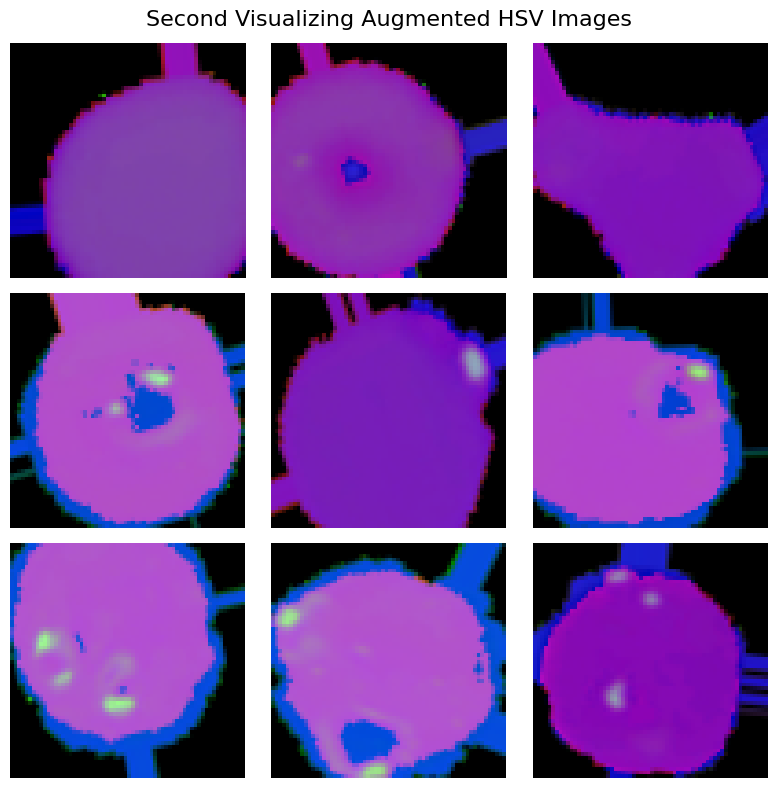

In [ ]:
# Visualize some augmented images
augmented_images1, augmented_labels1 = next(hsv_train_generator1)

plt.figure(figsize=(8, 8))
for i in range(9):  # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images1[i])
    plt.axis('off')
plt.suptitle("Second Visualizing Augmented HSV Images", fontsize=16)
plt.tight_layout()
plt.show()

<b>Build HSV Augmentation Model</b>

In [ ]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Build the CNN model with LeakyReLU and BatchNormalization
hsv_model_augument1 = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),  # LeakyReLU activation
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Flatten the feature maps for dense layers
    Flatten(),

    # Fully connected dense layers
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    # Output layer for binary classification
    Dense(2, activation='softmax')
])

# Display model summary
hsv_model_augument1.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,738 (4.99 MB)

 Trainable params: 1,307,522 (4.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

<b>Compiling The Model</>

In [ ]:
# Compile the model
hsv_model_augument1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b>Using callback</b>

In [ ]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', verbose=1),  # Fixed extension
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

<b>Fit and train HSV image Model

In [ ]:
# Train the model with callbacks
history = hsv_model_augument1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6733 - loss: 0.6788
Epoch 1: val_loss improved from inf to 0.64664, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.6735 - loss: 0.6784 - val_accuracy: 0.8170 - val_loss: 0.6466 - learning_rate: 0.0010
Epoch 2/20
496/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9315 - loss: 0.1880
Epoch 2: val_loss improved from 0.64664 to 0.13671, saving model to best_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9316 - loss: 0.1877 - val_accuracy: 0.9544 - val_loss: 0.1367 - learning_rate: 0.0010
Epoch 3/20
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9566 - loss: 0.1341
Epoch 3: val_loss did not improve from 0.13671
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9566 - loss: 0.1340 - val_accuracy: 0.9577 - val_loss: 0.1483 - learning_rate: 0.0010
Epoch 4/20
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9638 - loss: 0.1105
Epoch 4: val_loss

<b>Evaluate The Model</b>

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = hsv_model_augument1.evaluate(X_val, y_val)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loass: {test_loss *100:.2f}%")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.0737
Test Accuracy: 97.40%
Test Loass: 7.88%


<b> Plotting the confusion matrix</b>

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Second HSV Augmentation Classification Report:
              precision    recall  f1-score   support

  Uninfected       0.96      0.99      0.97      2442
 Parasitized       0.99      0.96      0.97      2550

    accuracy                           0.97      4992
   macro avg       0.97      0.97      0.97      4992
weighted avg       0.97      0.97      0.97      4992



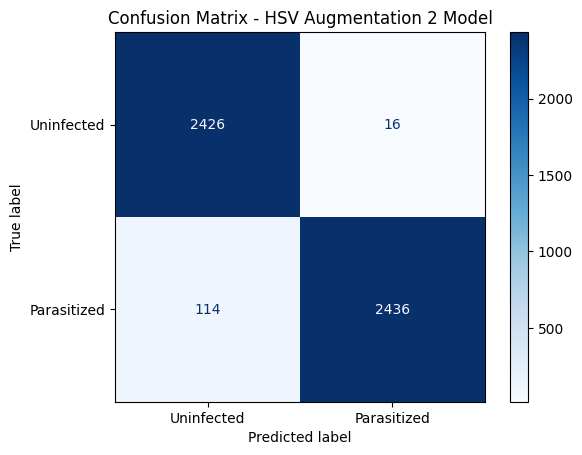

In [ ]:
# Convert to class labels
true_labels = np.argmax(y_val, axis=1)

# Get predicted labels from the improved model
predicted_probs = hsv_model_augument1.predict(X_val)
predicted_labels = np.argmax(predicted_probs, axis=1)

# Generate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=["Uninfected", "Parasitized"])
print("Second HSV Augmentation Classification Report:")
print(class_report)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Uninfected", "Parasitized"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - HSV Augmentation 2 Model")
plt.show()

<b>Observation:</b>
* For the HSV image, the Base Model is currently the best-performing model as it strikes a balance between precision, recall, and F1-score with fewer false negatives for parasitized cases. However, the RGB image Base Model out perform the HSV Base Model. This could be due to some factors (e,g., Data size, noise)

<b>Plotting the train and validation curves</b>:

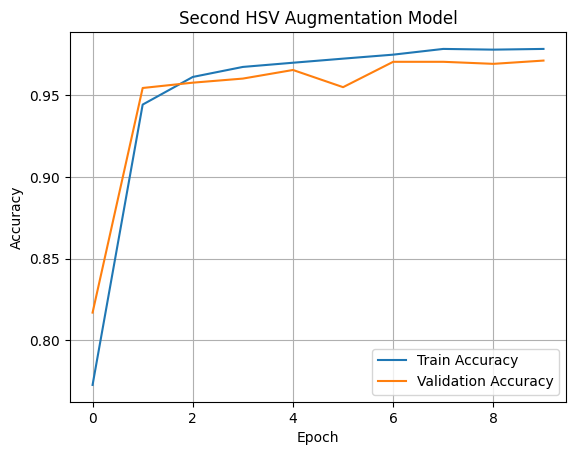

In [ ]:
# Visualize training performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Second HSV Augmentation Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

<b>Observations:</b>
* Both training and validation accuracy improve rapidly within the first 2 epochs, reaching above 95% accuracy early in the training process. This indicates efficient learning from the dataset.
* The model reaches a performance plateau around epoch 5, with minimal improvement in accuracy afterward. This suggests that additional epochs do not significantly enhance performance.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
  * The dataset is relatively balanced between the two classes: Uninfected and Parasitized.
  * Balanced classes reduce the risk of bias in predictions and ensure fair evaluation of the model's performance.
  * A balanced dataset simplifies model training and evaluation, as no additional measures (e.g., oversampling or class weighting) are needed to handle class imbalance.

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

  **Different techniques performance**
  * Base Model

      Accuracy: 98%
      Precision, Recall, F1-Score: High (0.98 for both classes)

      Observations: Very few false positives and false negatives. The model generalizes well and performs consistently across both classes.
      
      Best For: A baseline benchmark; performs well but may not adapt well to real-world variations.
  * Improved Model

      Accuracy: 86%
      Precision, Recall, F1-Score: Higher for Parasitized precision but significantly lower recall (0.72).
      
      Observations: False negatives for the Parasitized class are relatively high (359), which can lead to critical misclassifications in a clinical setting. Uninfected class has almost perfect recall (1.00), indicating a bias toward predicting Uninfected.

      Scope for Improvement: Needs better balance between precision and recall for parasitized cells.

  * Batch Normalization Model

      Accuracy: 84%
      Precision, Recall, F1-Score: Similar precision to the improved model but lower recall for parasitized cells (0.67).

      Observations: The model achieves high precision but struggles with parasitized recall, with 427 false negatives. Overemphasis on precision may make it less clinically reliable.

      Scope for Improvement: Adjust thresholds or apply class balancing techniques.

  * Augmentation Model (First Attempt)

      Accuracy: 50%
      Precision, Recall, F1-Score: Low (0.49–0.51 across metrics)
      
      Observations: Poor performance across both classes due to likely overfitting or augmentation artifacts. High confusion between Uninfected and Parasitized samples.

      Scope for Improvement: Improve augmentation techniques and use better regularization.

  * Augmentation Model (Second Attempt)

      Accuracy: 98%
      Precision, Recall, F1-Score: Excellent (0.97–0.99 across both classes)

      Observations: Near-perfect balance between precision and recall. Only a few false positives and false negatives, making it robust and reliable.
  
      Best For: Real-world applications requiring high sensitivity and specificity.

      Scope for Improvement: Minimal, as the model already performs near-perfectly.

  * VGG16 Model

      Accuracy: 95%
      Precision, Recall, F1-Score: High overall performance (0.93–0.97).

      Observations: A reliable model with high generalization. Slightly higher false negatives for Parasitized compared to the second augmentation model.

      Best For: Leveraging transfer learning and pre-trained features.

      Scope for Improvement: Fine-tune additional layers of VGG16 or use a weighted loss to prioritize recall for parasitized cells.


####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

  * Augmentation Model (Second Attempt)

      Accuracy: 98% Precision, Recall, F1-Score: Excellent (0.97–0.99 across both classes)

      Observations: Near-perfect balance between precision and recall. Only a few false positives and false negatives, making it robust and reliable.
      
      Best For: Real-world applications requiring high sensitivity and specificity.
